# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [238]:
# Installing the libraries with the specified version.
!pip install --upgrade pip
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user


  Using cached pip-24.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
c:\python39\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [240]:
# this will help in making the Python code more structured automatically (good coding practice)

#!pip install nb-black # In case you are working locally
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    make_scorer,
)
# Load the CSV data into a pandas DataFrame
df = pd.read_csv('./Loan_Modelling.csv')

# Print the first few rows of the DataFrame to verify the data was loaded correctly
print(df.head())

#!pip install uszipcode
#!pip install --upgrade uszipcode


   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [241]:

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('./Loan_Modelling.csv')

# Print the first few rows of the DataFrame to verify the data was loaded correctly
print(data.head())

   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [126]:
# copying data to another varaible to avoid any changes to original data
data = df.copy()

In [242]:
num_rows, num_cols = data.shape
print("Total number of rows:", num_rows)
print("Total number of columns:", num_cols)

Total number of rows: 5000
Total number of columns: 14


In [128]:
data.drop(["ID"], axis=1, inplace=True)


## Data Overview

* Observations
* Sanity checks

The preliminary steps in obtaining an overview of any dataset include the following:

1. Reviewing the initial rows of the dataset to verify successful loading.
2. Acquiring details about the dataset's dimensions, encompassing the number of rows and columns.
3. Verifying the data types of the columns to ensure proper storage format and expected property values.
4. Examining the statistical summary of the dataset to comprehend the numerical aspects of the data columns.

# View the first and last 5 rows of the dataset.


In [243]:
data.head(5)  ##  Complete the code to display the top 5 rows of the data.

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [244]:
data["ZIPCode"].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64

In [130]:
data.tail(5)  ##  Complete the code to view last 5 rows of the data

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


# Understand the shape of the dataset.


In [131]:
data.shape  ##  Complete the code to view dimensions of the data


(5000, 13)

# Check the data types of the columns for the dataset

In [132]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


# Checking the Statistical Summary


In [133]:
data.describe().T  ## Complete the code to get the statistical summary of the data


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


# Let's drop the ID column first before we proceed forward


In [134]:
data.head()


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Checking for Anomalous Values


In [135]:
# Let's map the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

# Treating the negative values of Experience: We assume that these negative signs here are data input errors, so we will replace them with positive signs

In [136]:
# checking if experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3], dtype=int64)

In [137]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [138]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [139]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [140]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,Undergraduate,0,0,1,0,0,0
1,45,19,34,90,3,1.5,Undergraduate,0,0,1,0,0,0
2,39,15,11,94,1,1.0,Undergraduate,0,0,0,0,0,0
3,35,9,100,94,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91,4,1.0,Graduate,0,0,0,0,0,1


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   object  
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(10), object(1)
memory usage: 474.1+ KB


In [142]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")    # Complete the code to convert the cat_cols to category

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

# Univariate Analysis


In [145]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    Parameters:
    data (pandas.DataFrame): Input data
    feature (str): Column name of the feature to plot
    figsize (tuple, optional): Size of the figure (default (12, 7))
    kde (bool, optional): Whether to show the density curve (default False)
    bins (int, optional): Number of bins for the histogram (default None)

    Returns:
    None
    """
    # Generate random colors
    random_color_boxplot = (random.random(), random.random(), random.random())
    random_color_histplot = (random.random(), random.random(), random.random())

    # Create the figure and subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    # Boxplot
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box2,
        showmeans=True,
        color="#3498db"  # use a fixed color or replace with random_color_boxplot
    )

    # Histplot
    sns.histplot(
        data=data,
        x=feature,
        kde=kde,
        ax=ax_hist2,
        bins=bins,
        color=random_color_histplot  # use the random color
    )

    # Add mean and median lines to the histogram
    ax_hist2.axvline(
        data[feature].mean(),
        color="#34c759",  # green
        linestyle="--",
        linewidth=2,
        label="Mean"
    )
    ax_hist2.axvline(
        data[feature].median(),
        color="#666666",  # gray
        linestyle="-",
        linewidth=2,
        label="Median"
    )

    # Add legend to the histogram
    ax_hist2.legend(loc="upper right")

    # Show the plot
    plt.show()

In [146]:
def plot_histogram_and_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    This function plots a combined boxplot and histogram for the given feature.

    Parameters:
    data: DataFrame - the data from which to plot the histogram and boxplot.
    feature: str - the name of the column in 'data' to plot.
    figsize: tuple - the size of the figure to plot. Default is (12,7).
    kde: bool - whether or not to plot the kernel density estimate. Default is False.
    bins: int - the number of bins to use for the histogram. Default is None, which lets seaborn decide.
    """
    # Create a figure with two subplots, one above the other
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Plot the boxplot in the first subplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box, showmeans=True, color="skyblue"
    )
    ax_box.set(xlabel='')  # Remove x-axis label for the boxplot
    ax_box.set_title('Boxplot and Histogram for {}'.format(feature), fontsize=15)  # Add title

    # Plot the histogram in the second subplot
    if bins:
        n, bins, patches = ax_hist.hist(data[feature], bins=bins, edgecolor='black')
        for i in range(bins.size-1):
            patches[i].set_facecolor(plt.cm.coolwarm(i/(bins.size-2)))
    else:
        n, bins, patches = ax_hist.hist(data[feature], edgecolor='black')
        for i in range(bins.size-1):
            patches[i].set_facecolor(plt.cm.coolwarm(i/(bins.size-2)))

    ax_hist.set_xlabel(feature, fontsize=13)  # Add x-axis label for the histogram
    ax_hist.set_ylabel('Frequency', fontsize=13)  # Add y-axis label for the histogram
    ax_hist.grid(True)  # Add gridlines

    # Add a vertical line for the mean in the histogram
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist.text(data[feature].mean()+data[feature].mean()/10, ax_hist.get_ylim()[1]*0.9, 'Mean', 
                 horizontalalignment='left', color='green', fontsize=12)

    # Add a vertical line for the median in the histogram
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )
    ax_hist.text(data[feature].median()+data[feature].median()/10, ax_hist.get_ylim()[1]*0.8, 'Median', 
                 horizontalalignment='left', color='black', fontsize=12)

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Creates a labeled bar plot with optional percentage display.

    Args:
        data (pd.DataFrame): The input dataframe.
        feature (str): The column name for the bar plot.
        perc (bool, optional): Whether to display percentages instead of counts. Defaults to False.
        n (int, optional): Displays the top n category levels. Defaults to None (i.e., display all levels).
    """
    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette=sns.color_palette("rainbow", count),
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for i, p in enumerate(ax.patches):
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # Percentage
        else:
            label = p.get_height()  # Count

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Annotate the percentage or count
        p.set_color(plt.cm.rainbow(np.linspace(0,1,count))[i])  # Set color for each bar

    plt.title('Bar Plot for {}'.format(feature), fontsize=20)  # Add title
    plt.xlabel(feature, fontsize=15)  # Add x-axis label
    plt.ylabel('Count' if not perc else 'Percentage', fontsize=15)  # Add y-axis label
    plt.grid(axis='y')  # Add horizontal grid lines

    plt.show()  # Show the plot

# Observations on Age


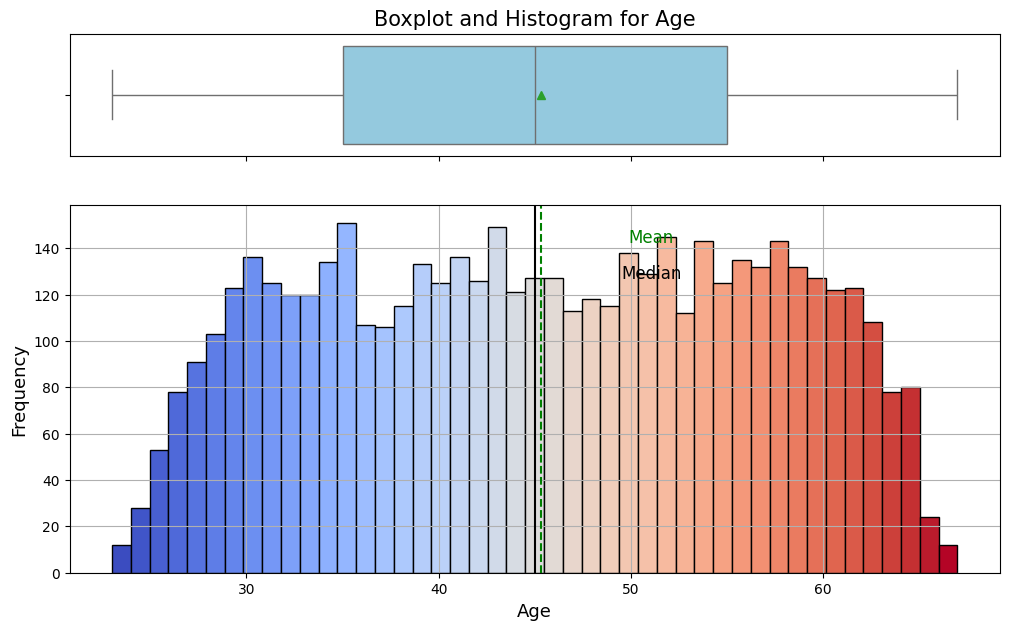

In [148]:
plot_histogram_and_boxplot(data, "Age", figsize=(12, 7), kde=True, bins=45)


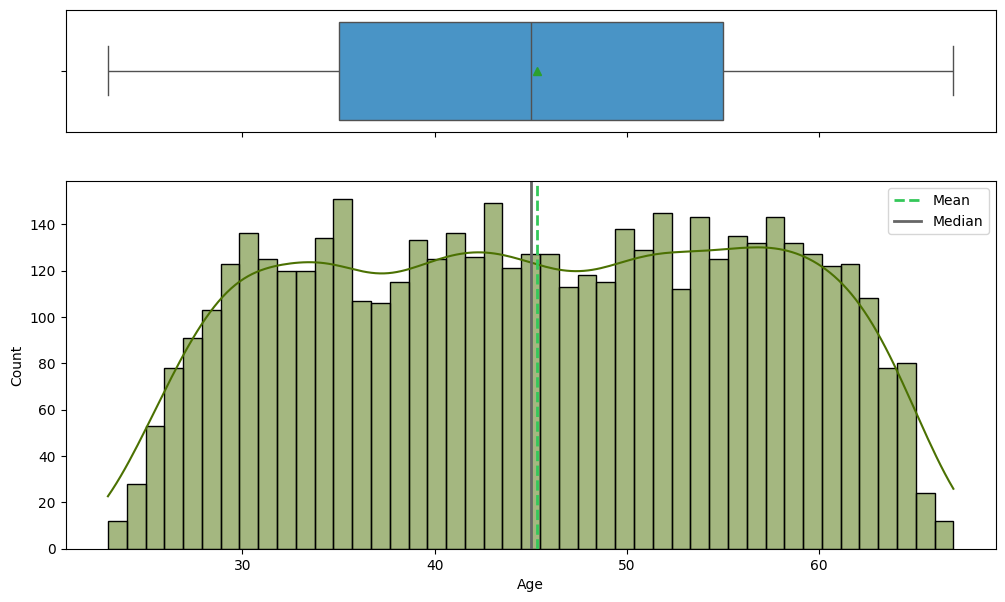

In [151]:
histogram_boxplot(data, "Age", figsize=(12, 7), kde=True, bins=45)


# Observations on Experience


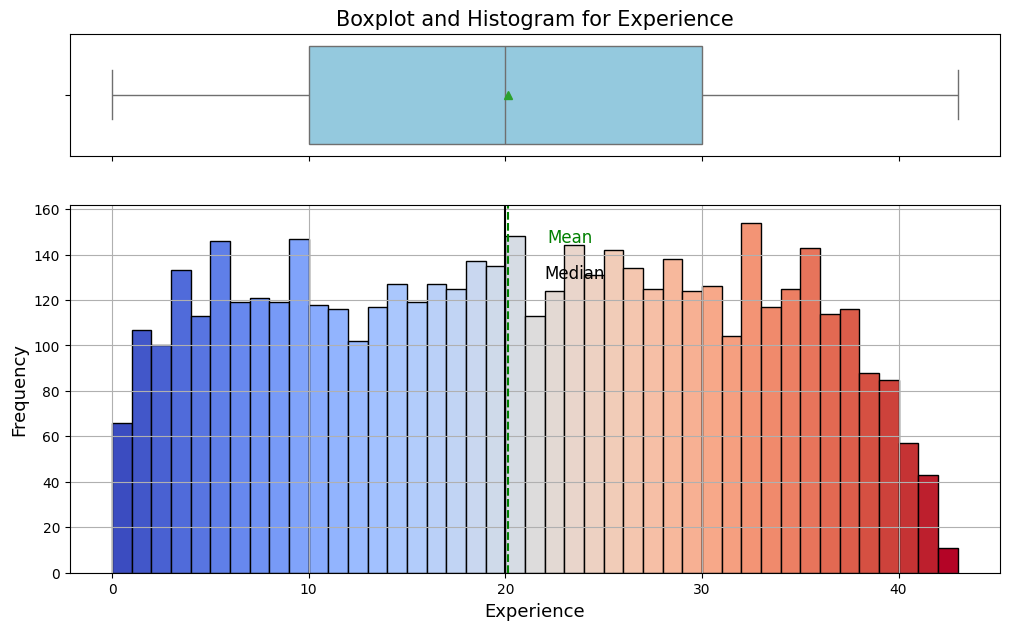

In [152]:
plot_histogram_and_boxplot(data, 'Experience', figsize=(12, 7), kde=True, bins=43)

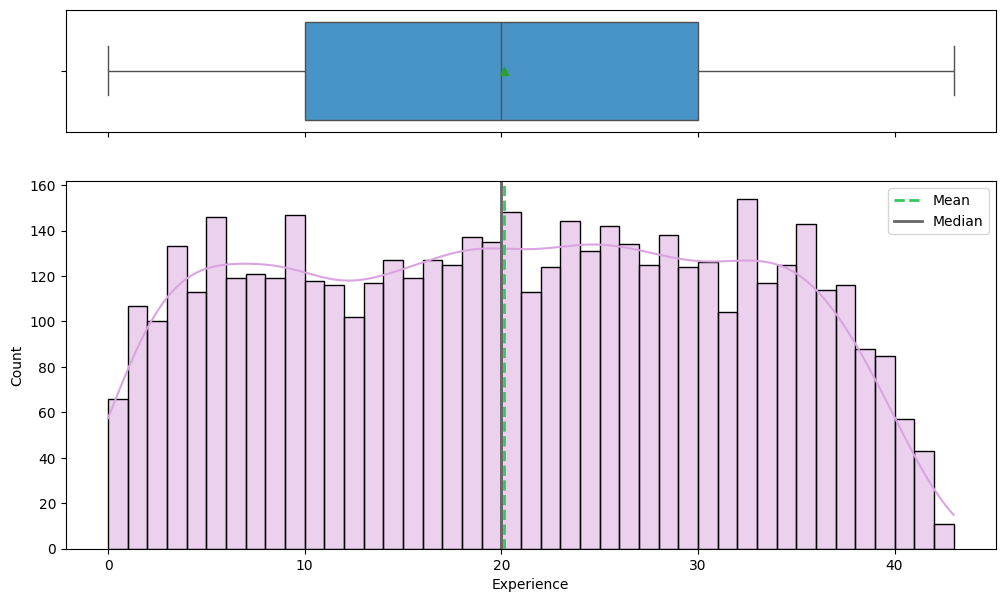

In [153]:
histogram_boxplot(data, 'Experience', figsize=(12, 7), kde=True, bins=43) ## Complete the code to create histogram_boxplot for experience


# Observations on Income


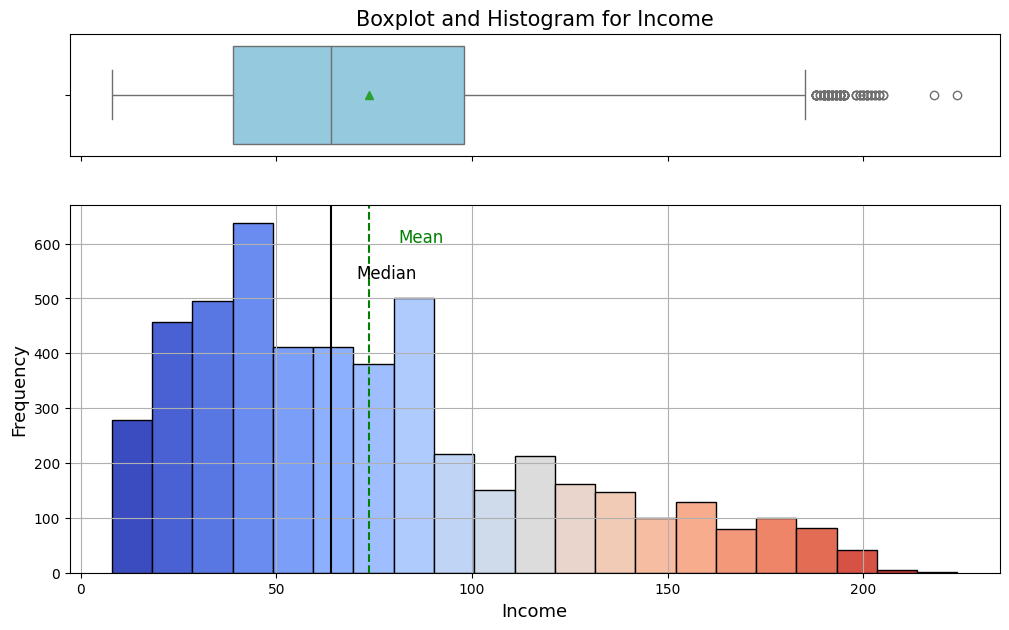

In [154]:
plot_histogram_and_boxplot(data, 'Income', figsize=(12, 7), kde=True, bins=21)  ## Complete the code to create histogram_boxplot for Income

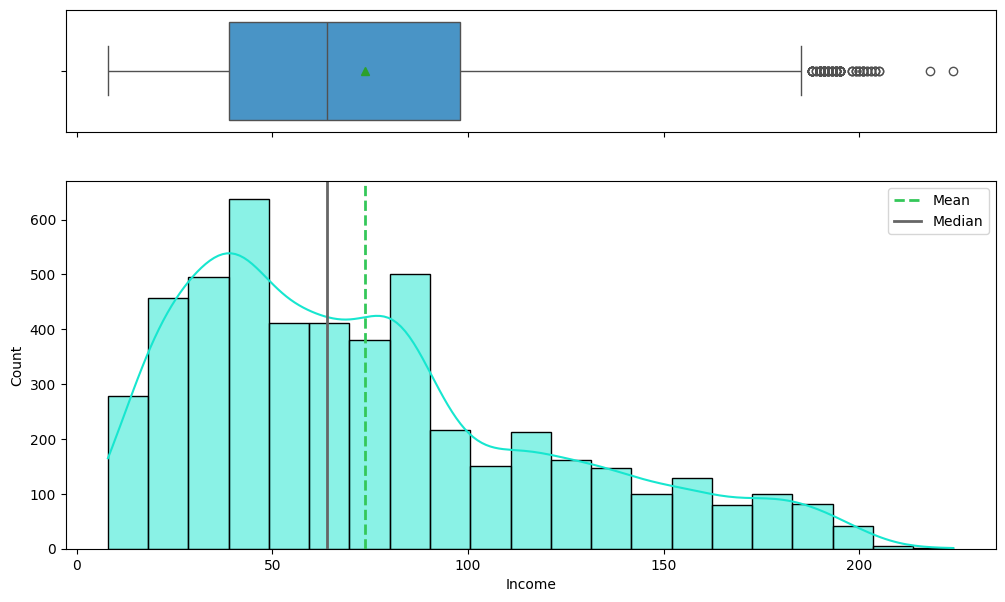

In [156]:
histogram_boxplot(data, 'Income', figsize=(12, 7), kde=True, bins=21)  ## Complete the code to create histogram_boxplot for Income


# Observations on CCAvg


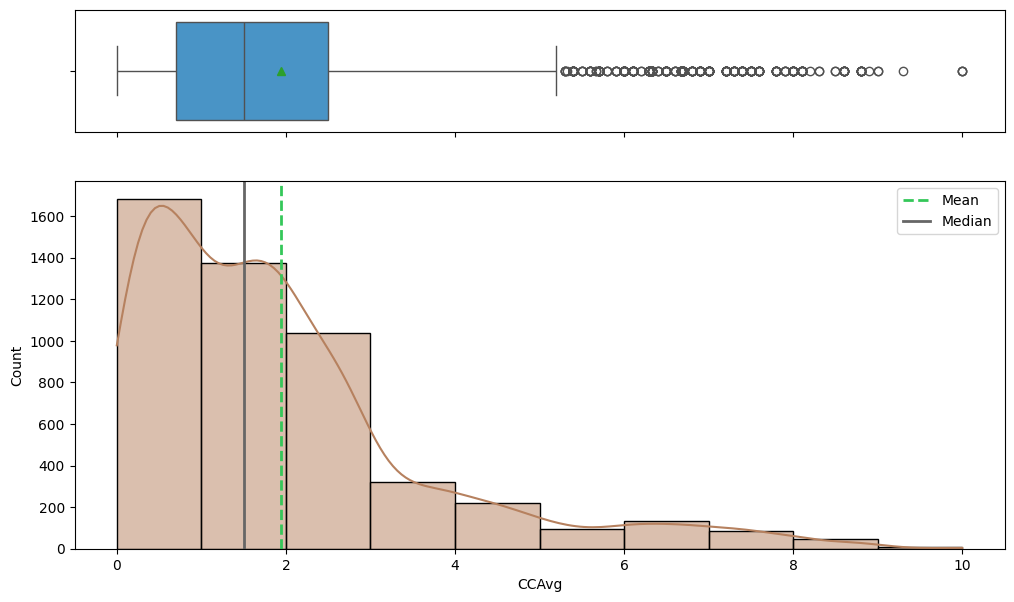

In [157]:
histogram_boxplot(data, 'CCAvg', figsize=(12, 7), kde=True, bins=10)

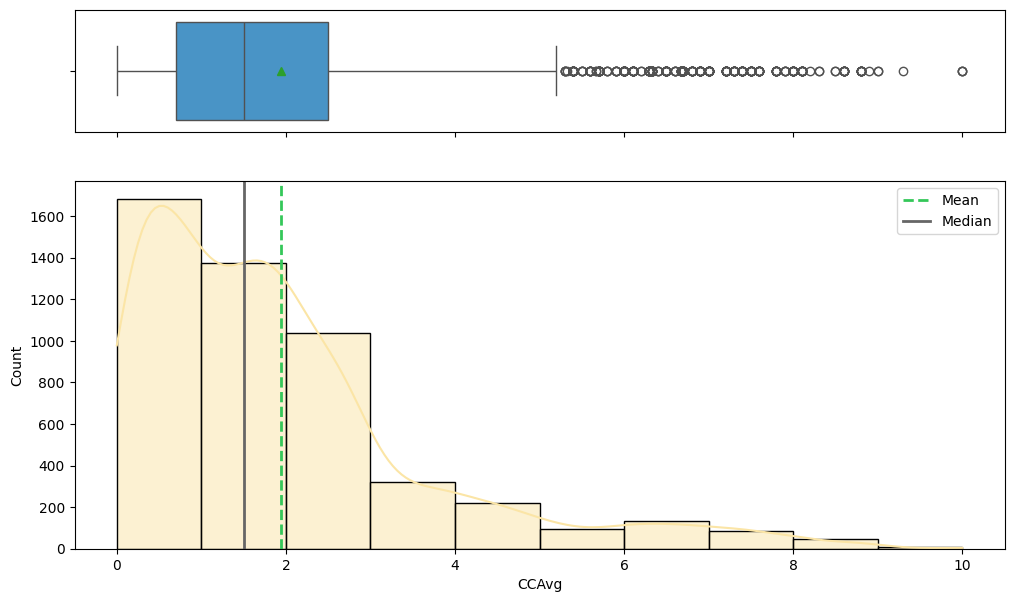

In [158]:
histogram_boxplot(data, 'CCAvg', figsize=(12, 7), kde=True, bins=10)  ## Complete the code to create histogram_boxplot for CCAvg


# Observations on Mortgage


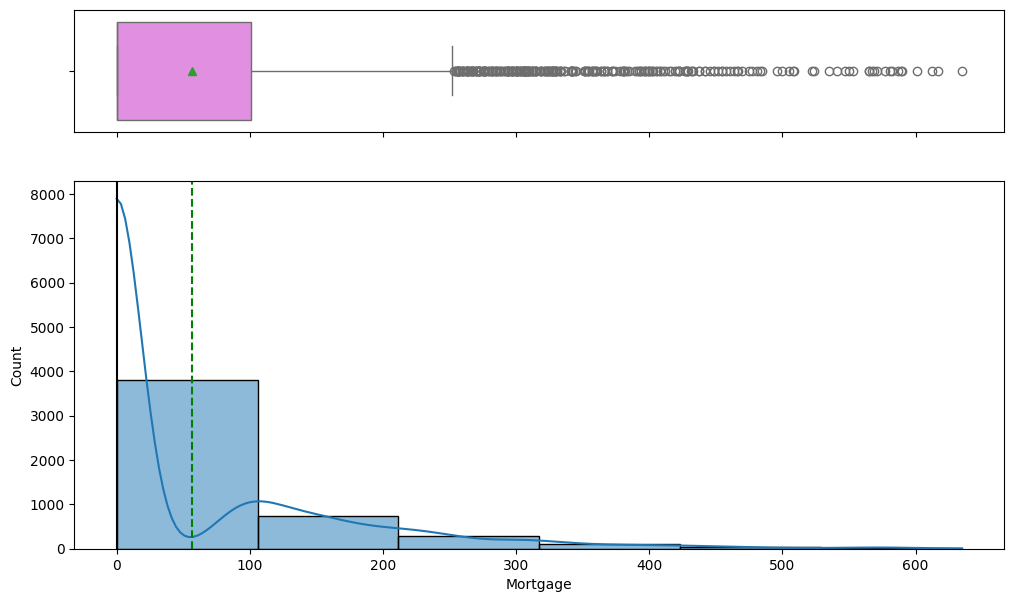

In [52]:
histogram_boxplot(data,'Mortgage', figsize=(12, 7), kde=True, bins=6)  ## Complete the code to create histogram_boxplot for Mortgage


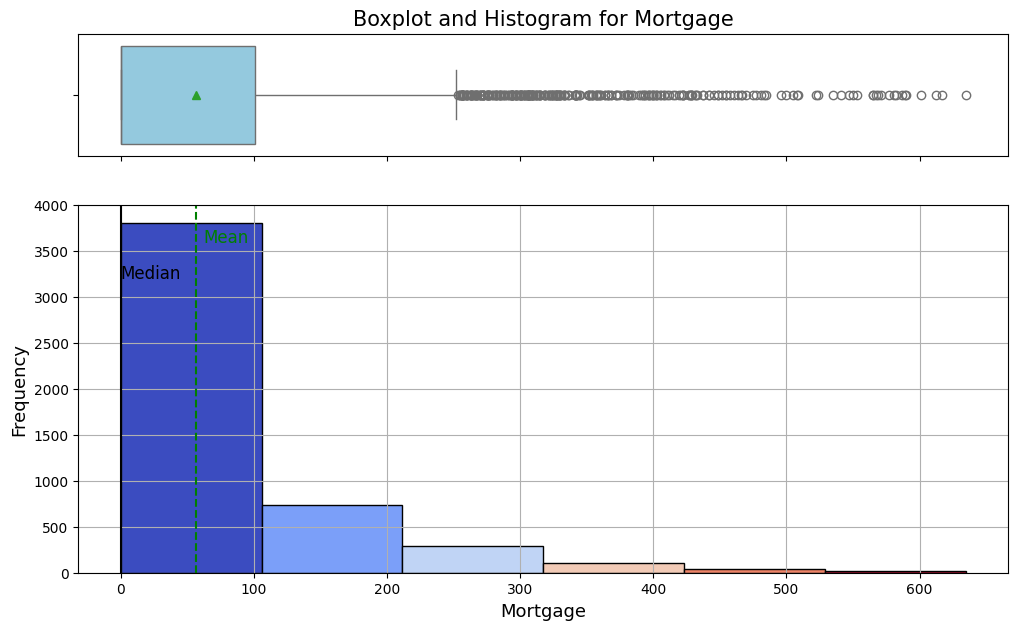

In [161]:
plot_histogram_and_boxplot(data,'Mortgage', figsize=(12, 7), kde=True, bins=6)

# Observations on Family


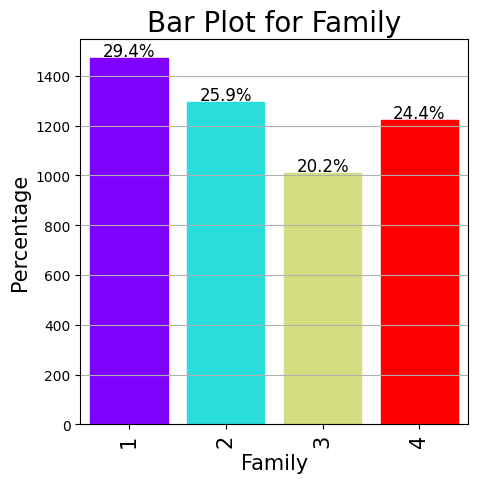

In [162]:
labeled_barplot(data, "Family", perc=True)


# Observations on Education


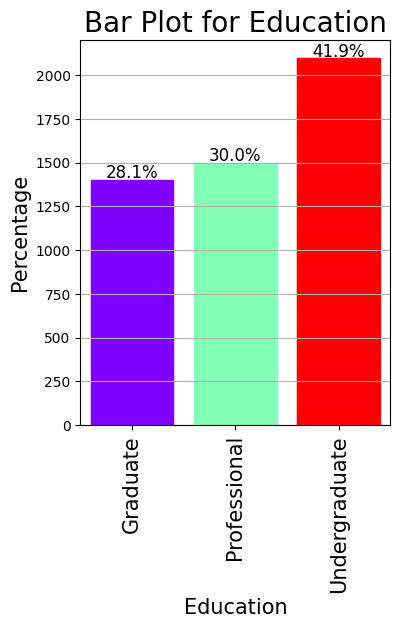

In [163]:
labeled_barplot(data, "Education", perc=True)   ## Complete the code to create labeled_barplot for Education


# Observations on Securities_Account


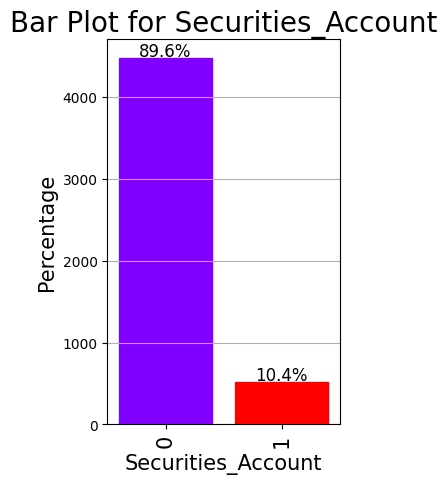

In [164]:
labeled_barplot(data, "Securities_Account", perc=True)   ## Complete the code to create labeled_barplot for Securities_Account


# Observations on CD_Account


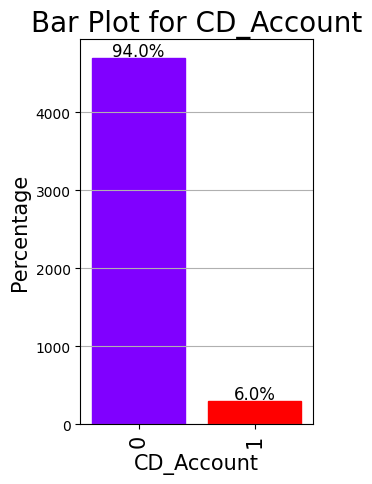

In [165]:
labeled_barplot(data, "CD_Account", perc=True)   ## Complete the code to create labeled_barplot for CD_Account


# Observations on Online


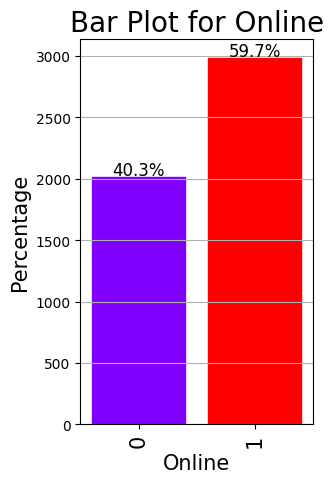

In [166]:
labeled_barplot(data, "Online", perc=True)   ## Complete the code to create labeled_barplot for Online


# Observation on CreditCard


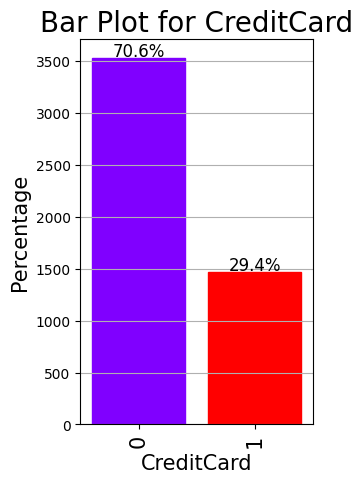

In [167]:
labeled_barplot(data, "CreditCard", perc=True)   ## Complete the code to create labeled_barplot for CreditCard


# Observation on ZIPCode


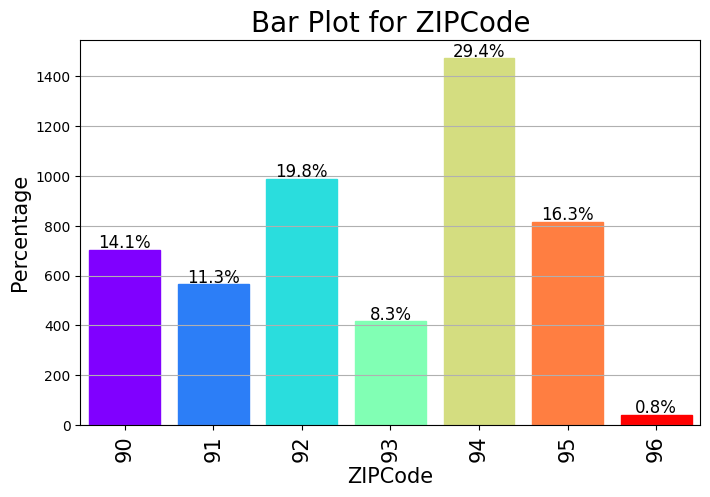

In [168]:
labeled_barplot(data, "ZIPCode", perc=True)   ## Complete the code to create labeled_barplot for ZIPCode


# Bivariate Analysis


In [169]:
### function to plot distributions wrt target


def distribution_plot_wrt_target1(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [170]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="#FFC069",  # New color
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="#6495ED",  # New color
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="rainbow")  # New color palette

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="rocket",  # New color palette
    )

    plt.tight_layout()
    plt.show()

In [171]:
def stacked_barplot1(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Add text annotation corresponding to the "count" of each bar on top
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center')

    plt.show()

In [172]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    # Bright and distinct colors
    colors = ["#34A85A", "#F7DC6F", "#6495ED", "#FFC579", "#8B9467", "#00BFFF"]
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), color=colors)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Add text annotation corresponding to the "count" of each bar on top
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2%}', (x + width/2, y + height/2), ha='center', color='white')

    # Customize plot appearance
    plt.title(f"Stacked Bar Chart - {predictor} vs {target}", fontsize=18)
    plt.xlabel(predictor, fontsize=14)
    plt.ylabel("Percentage", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

In [62]:
# 
# Correlation check

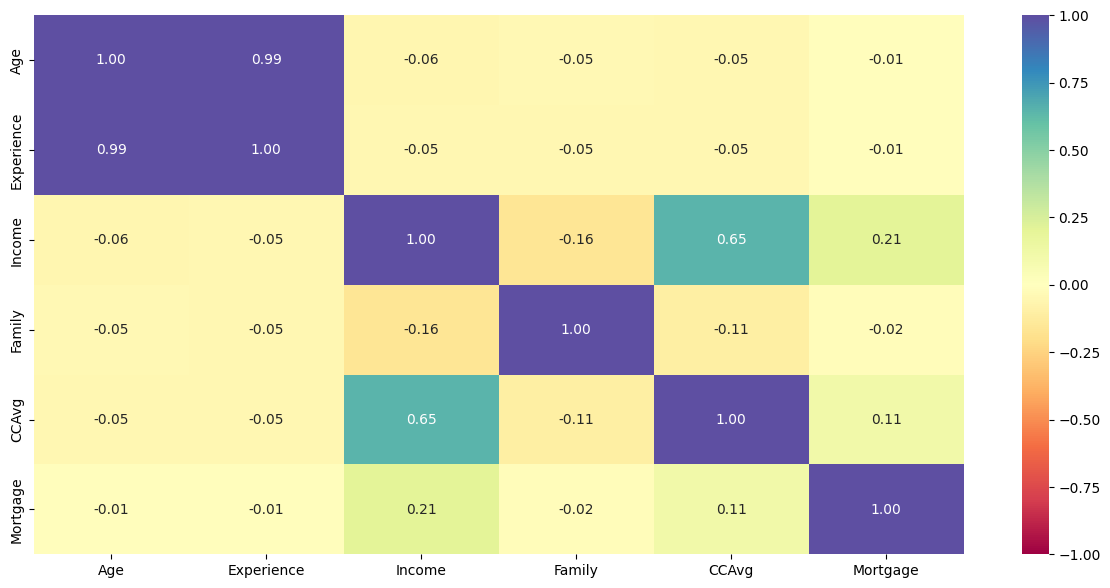

In [173]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

# Let's check how a customer's interest in purchasing a loan varies with their education


Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


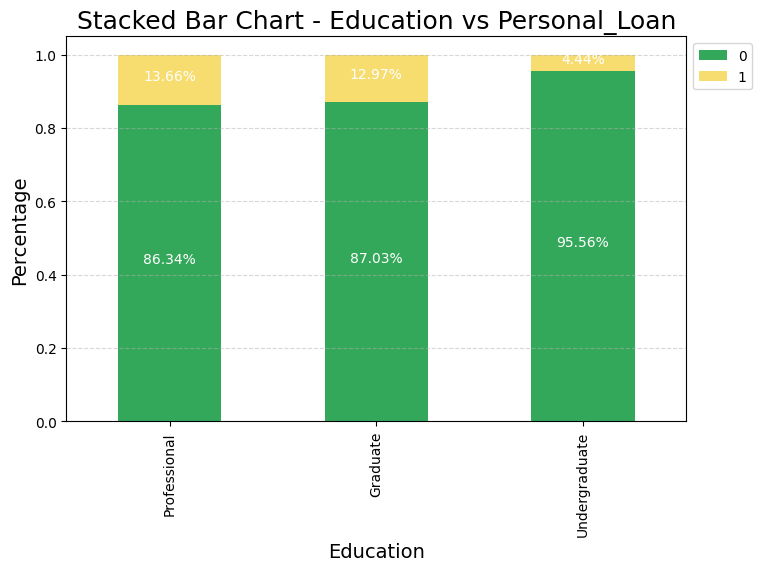

In [174]:
stacked_barplot(data, "Education", "Personal_Loan")


# Personal_Loan vs Family


Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


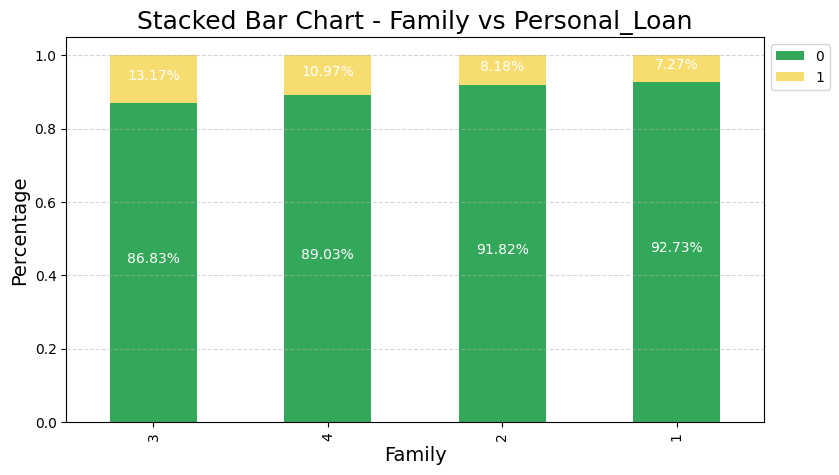

In [175]:
stacked_barplot(data, "Family", "Personal_Loan")  ## Complete the code to plot stacked barplot for Personal Loan and Family


# Personal_Loan vs Securities_Account


Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


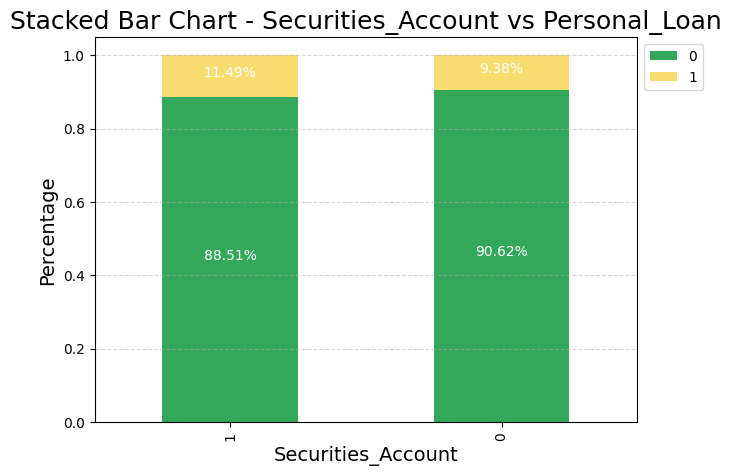

In [176]:
stacked_barplot(data, "Securities_Account", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Securities_Account


# Personal_Loan vs CD_Account


Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


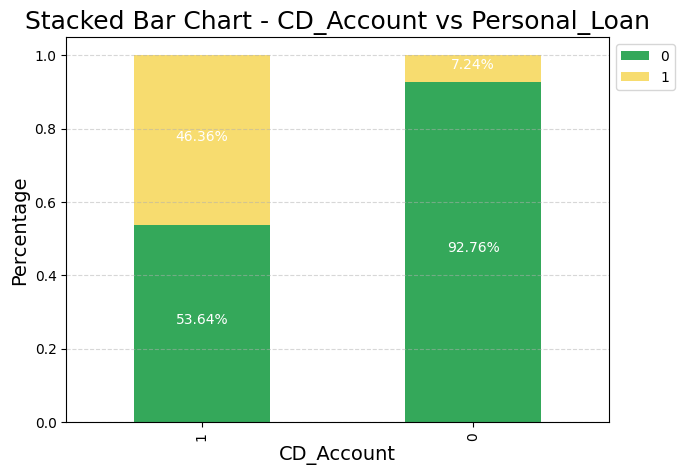

In [177]:
stacked_barplot(data, "CD_Account", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and CD_Account


# Personal_Loan vs Online


Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


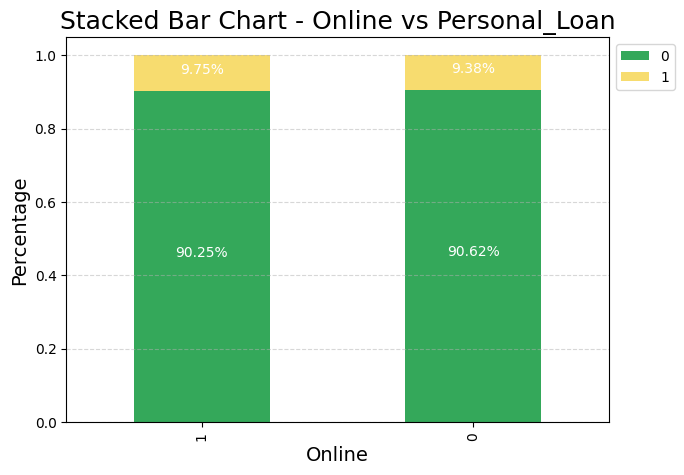

In [178]:
stacked_barplot(data, "Online", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Online


# Personal_Loan vs CreditCard


Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


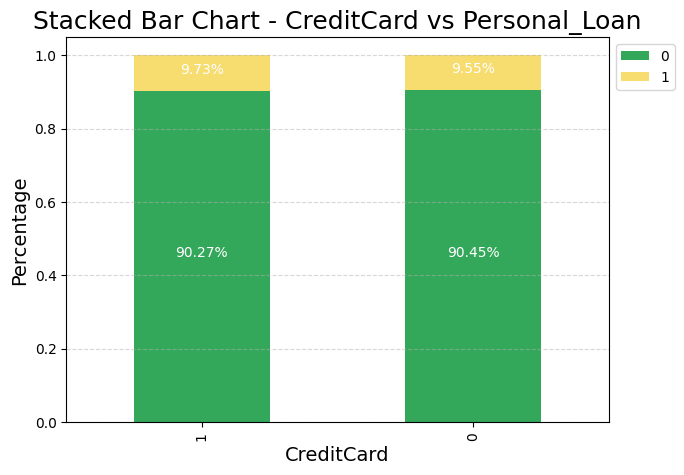

In [179]:
stacked_barplot(data, "CreditCard", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and CreditCard


# Personal_Loan vs ZIPCode


Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


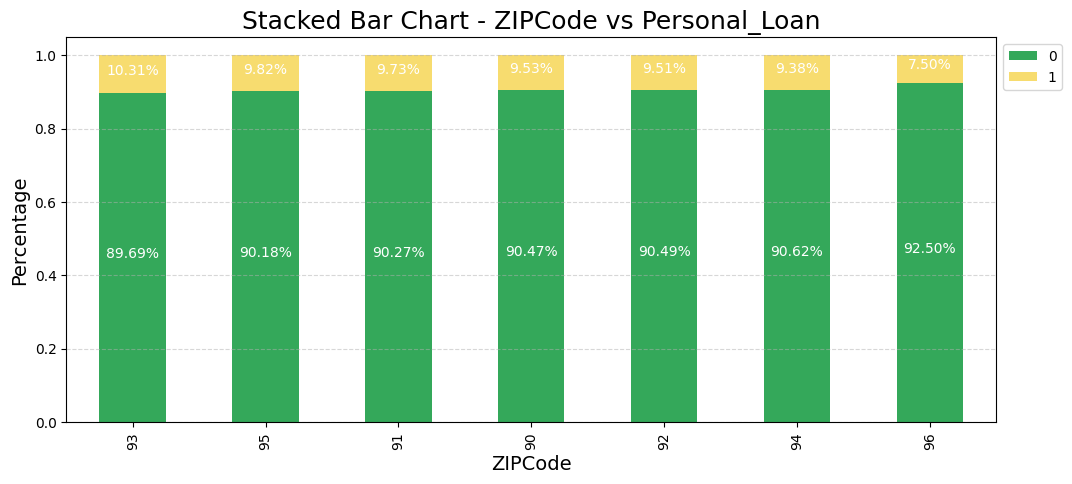

In [180]:
stacked_barplot(data, "ZIPCode", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and ZIPCode


# Let's check how a customer's interest in purchasing a loan varies with their age


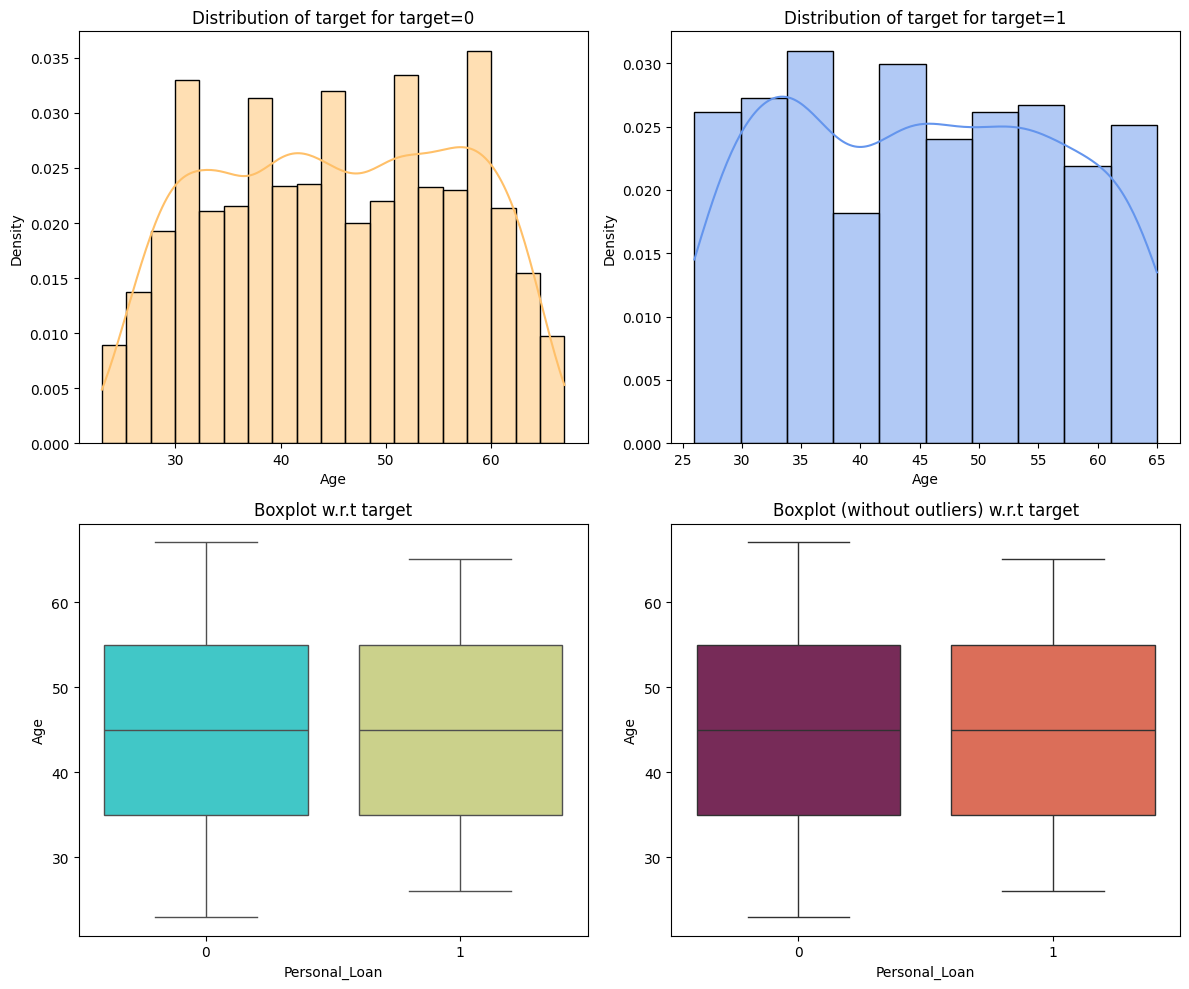

In [181]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")


# Personal Loan vs Experience


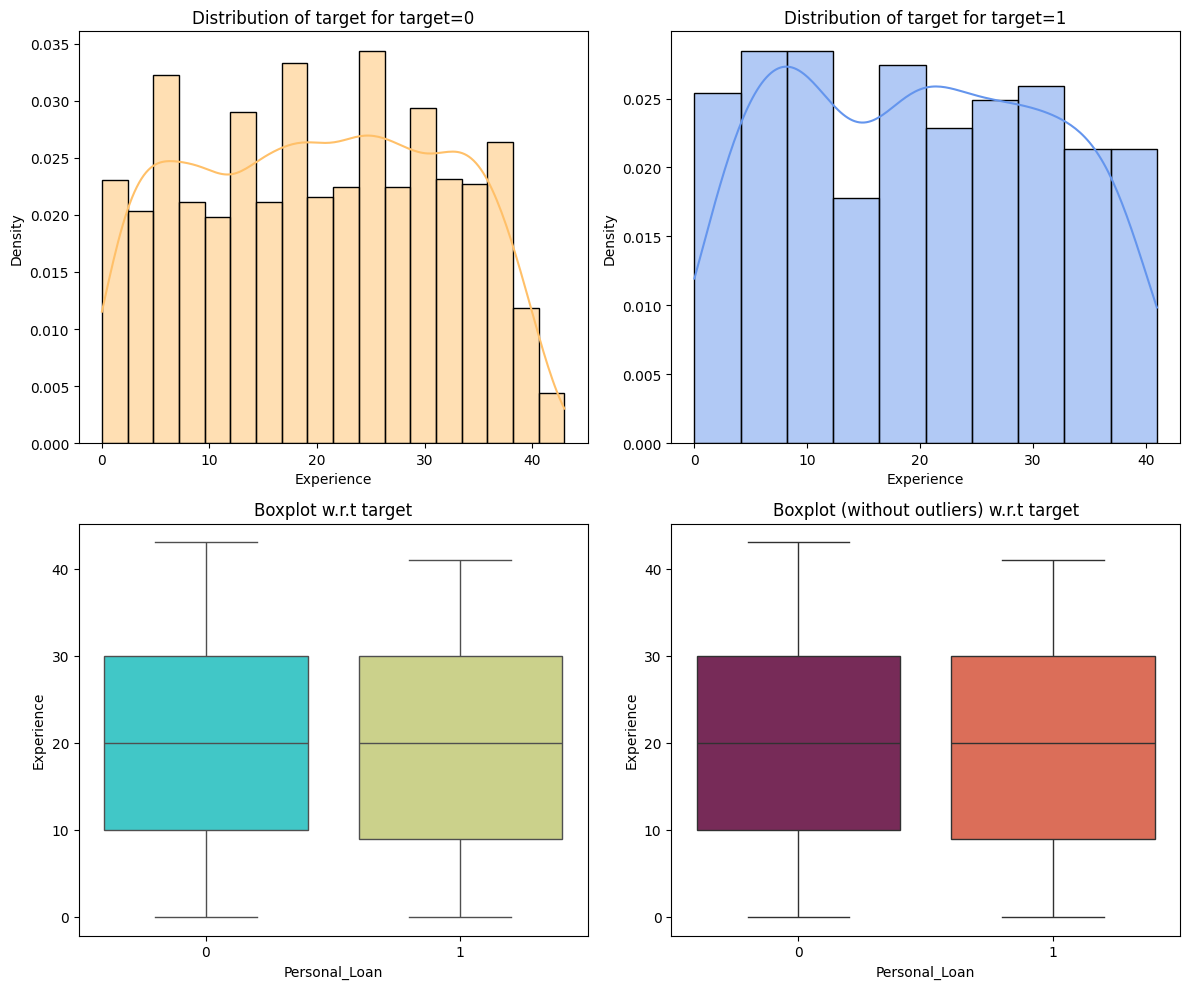

In [182]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Experience


# Personal Loan vs Income


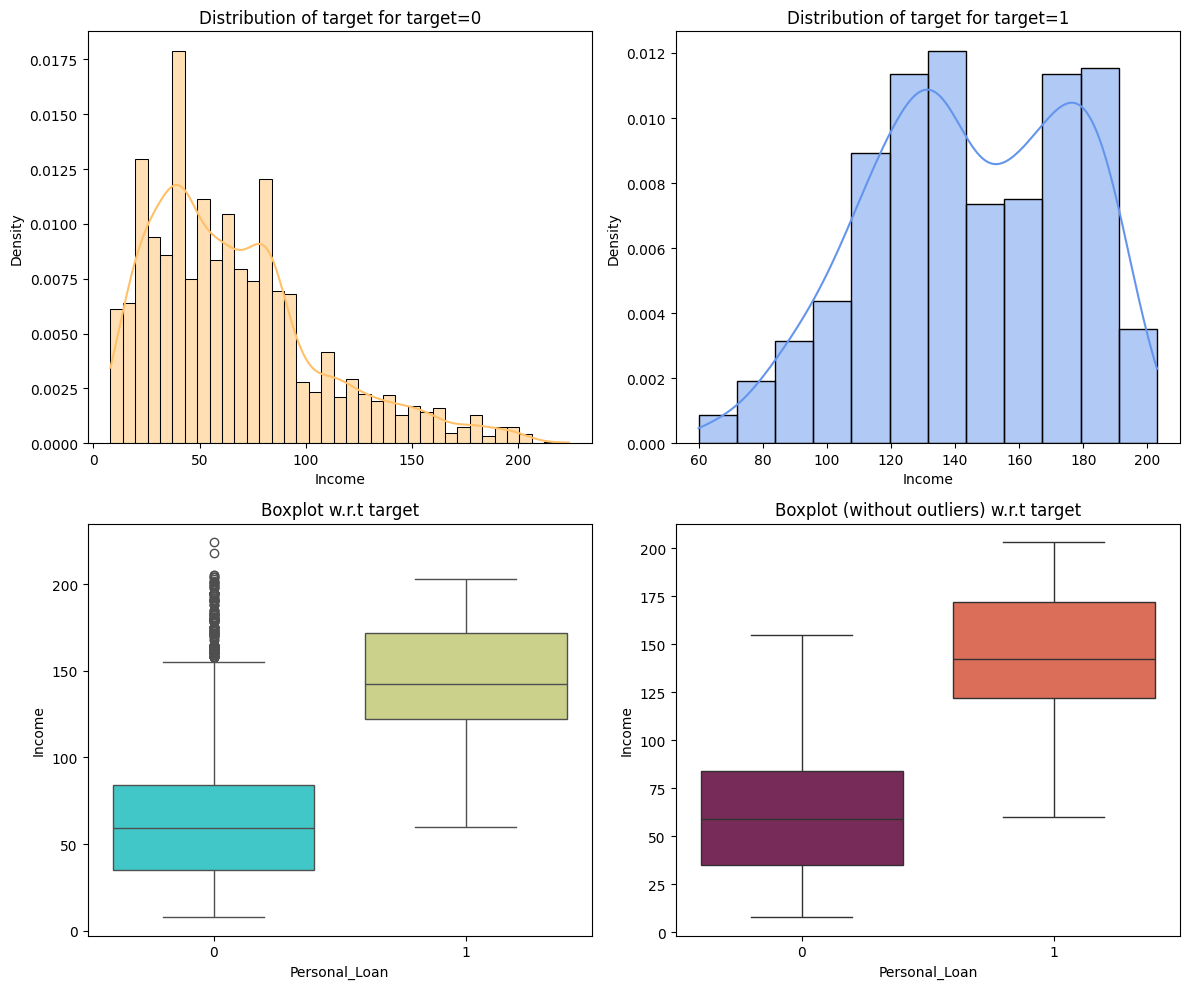

In [183]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Income


# Personal Loan vs CCAvg


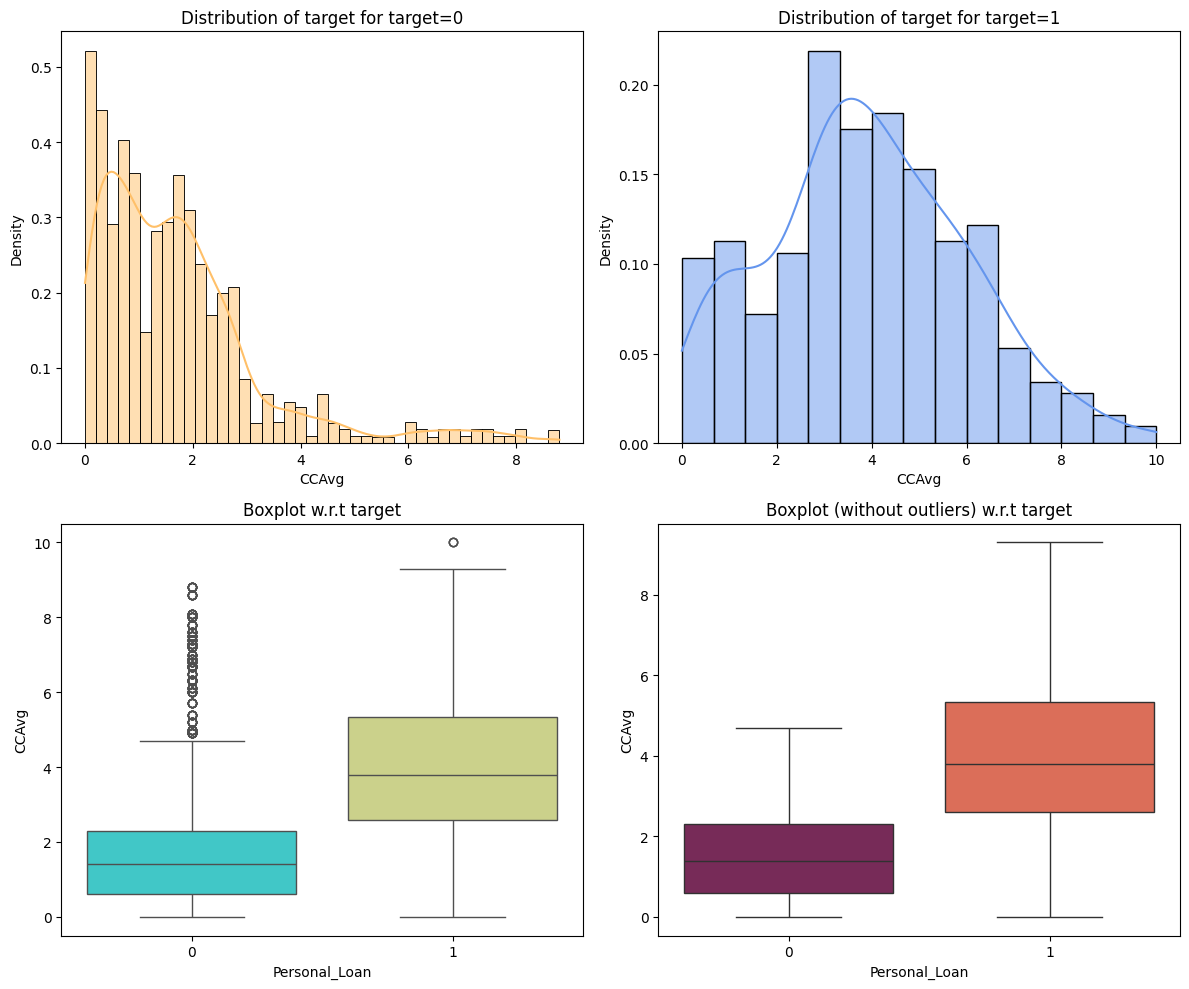

In [184]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and CCAvg


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

# Outlier Detection


In [185]:
Q1 = data.quantile(.25)  # Complete the code to find the 25th percentile and 75th percentile.
Q3 = data.quantile(.75)  # Complete the code to find the 75th percentile and 75th percentile.

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [186]:
((data.select_dtypes(include=["float64", "int64"]) < lower)
    |(data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

# Data Preparation for Modeling
The objective is to predict whether a liability customer will buy personal loans.
Before you proceed to build a model, you need to split the data into train, test and validation to be able to evaluate the model that you build on the train data
You'll have to encode categorical features and scale numerical values.
You will build a model using the train data and then check it's performance

In [187]:
# Separate independent and dependent variable
X = data.drop(["Personal_Loan", "Experience"], axis=1)
y = data["Personal_Loan"]

In [188]:
print(X)

      Age  Income ZIPCode  Family  CCAvg      Education  Mortgage  \
0      25      49      91       4    1.6  Undergraduate         0   
1      45      34      90       3    1.5  Undergraduate         0   
2      39      11      94       1    1.0  Undergraduate         0   
3      35     100      94       1    2.7       Graduate         0   
4      35      45      91       4    1.0       Graduate         0   
...   ...     ...     ...     ...    ...            ...       ...   
4995   29      40      92       1    1.9   Professional         0   
4996   30      15      92       4    0.4  Undergraduate        85   
4997   63      24      93       2    0.3   Professional         0   
4998   65      49      90       3    0.5       Graduate         0   
4999   28      83      92       3    0.8  Undergraduate         0   

     Securities_Account CD_Account Online CreditCard  
0                     1          0      0          0  
1                     1          0      0          0  
2     

In [189]:
# Complete the code to apply dummies on ZIPCode and Education
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Complete the code to split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [190]:
print("Shape of Training set : ", X_train.shape)     # Complete the code to get the shape of train data
print("Shape of test set : ", X_test.shape)           # Complete the code to get the shape of test data
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))              # Complete the code to get the value counts of y train data
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))           # Complete the code to get the value counts of y test data

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


# Model Building
Model Evaluation Criterion
Model can make wrong predictions as:

Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity
Which case is more important?

Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.
How to reduce this loss i.e need to reduce False Negatives?

Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.
First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models.
The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.
Model Building
First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

The model_performance_classification_sklearn function will be used to check the model performance of models.
The confusion_matrix_sklearnfunction will be used to plot confusion matrix.


In [191]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [192]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Build Decision Tree Model


In [193]:

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)  ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

# Checking model performance on training data


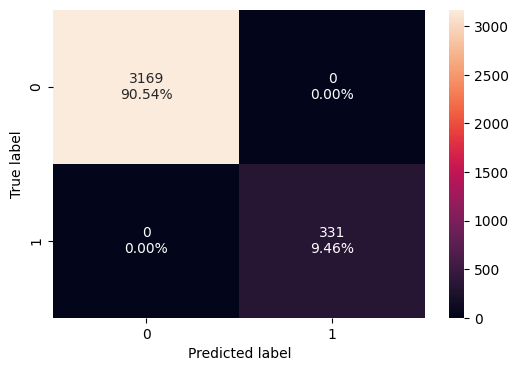

In [194]:
confusion_matrix_sklearn(model, X_train, y_train)


In [195]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


# Visualizing the Decision Tree


In [197]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


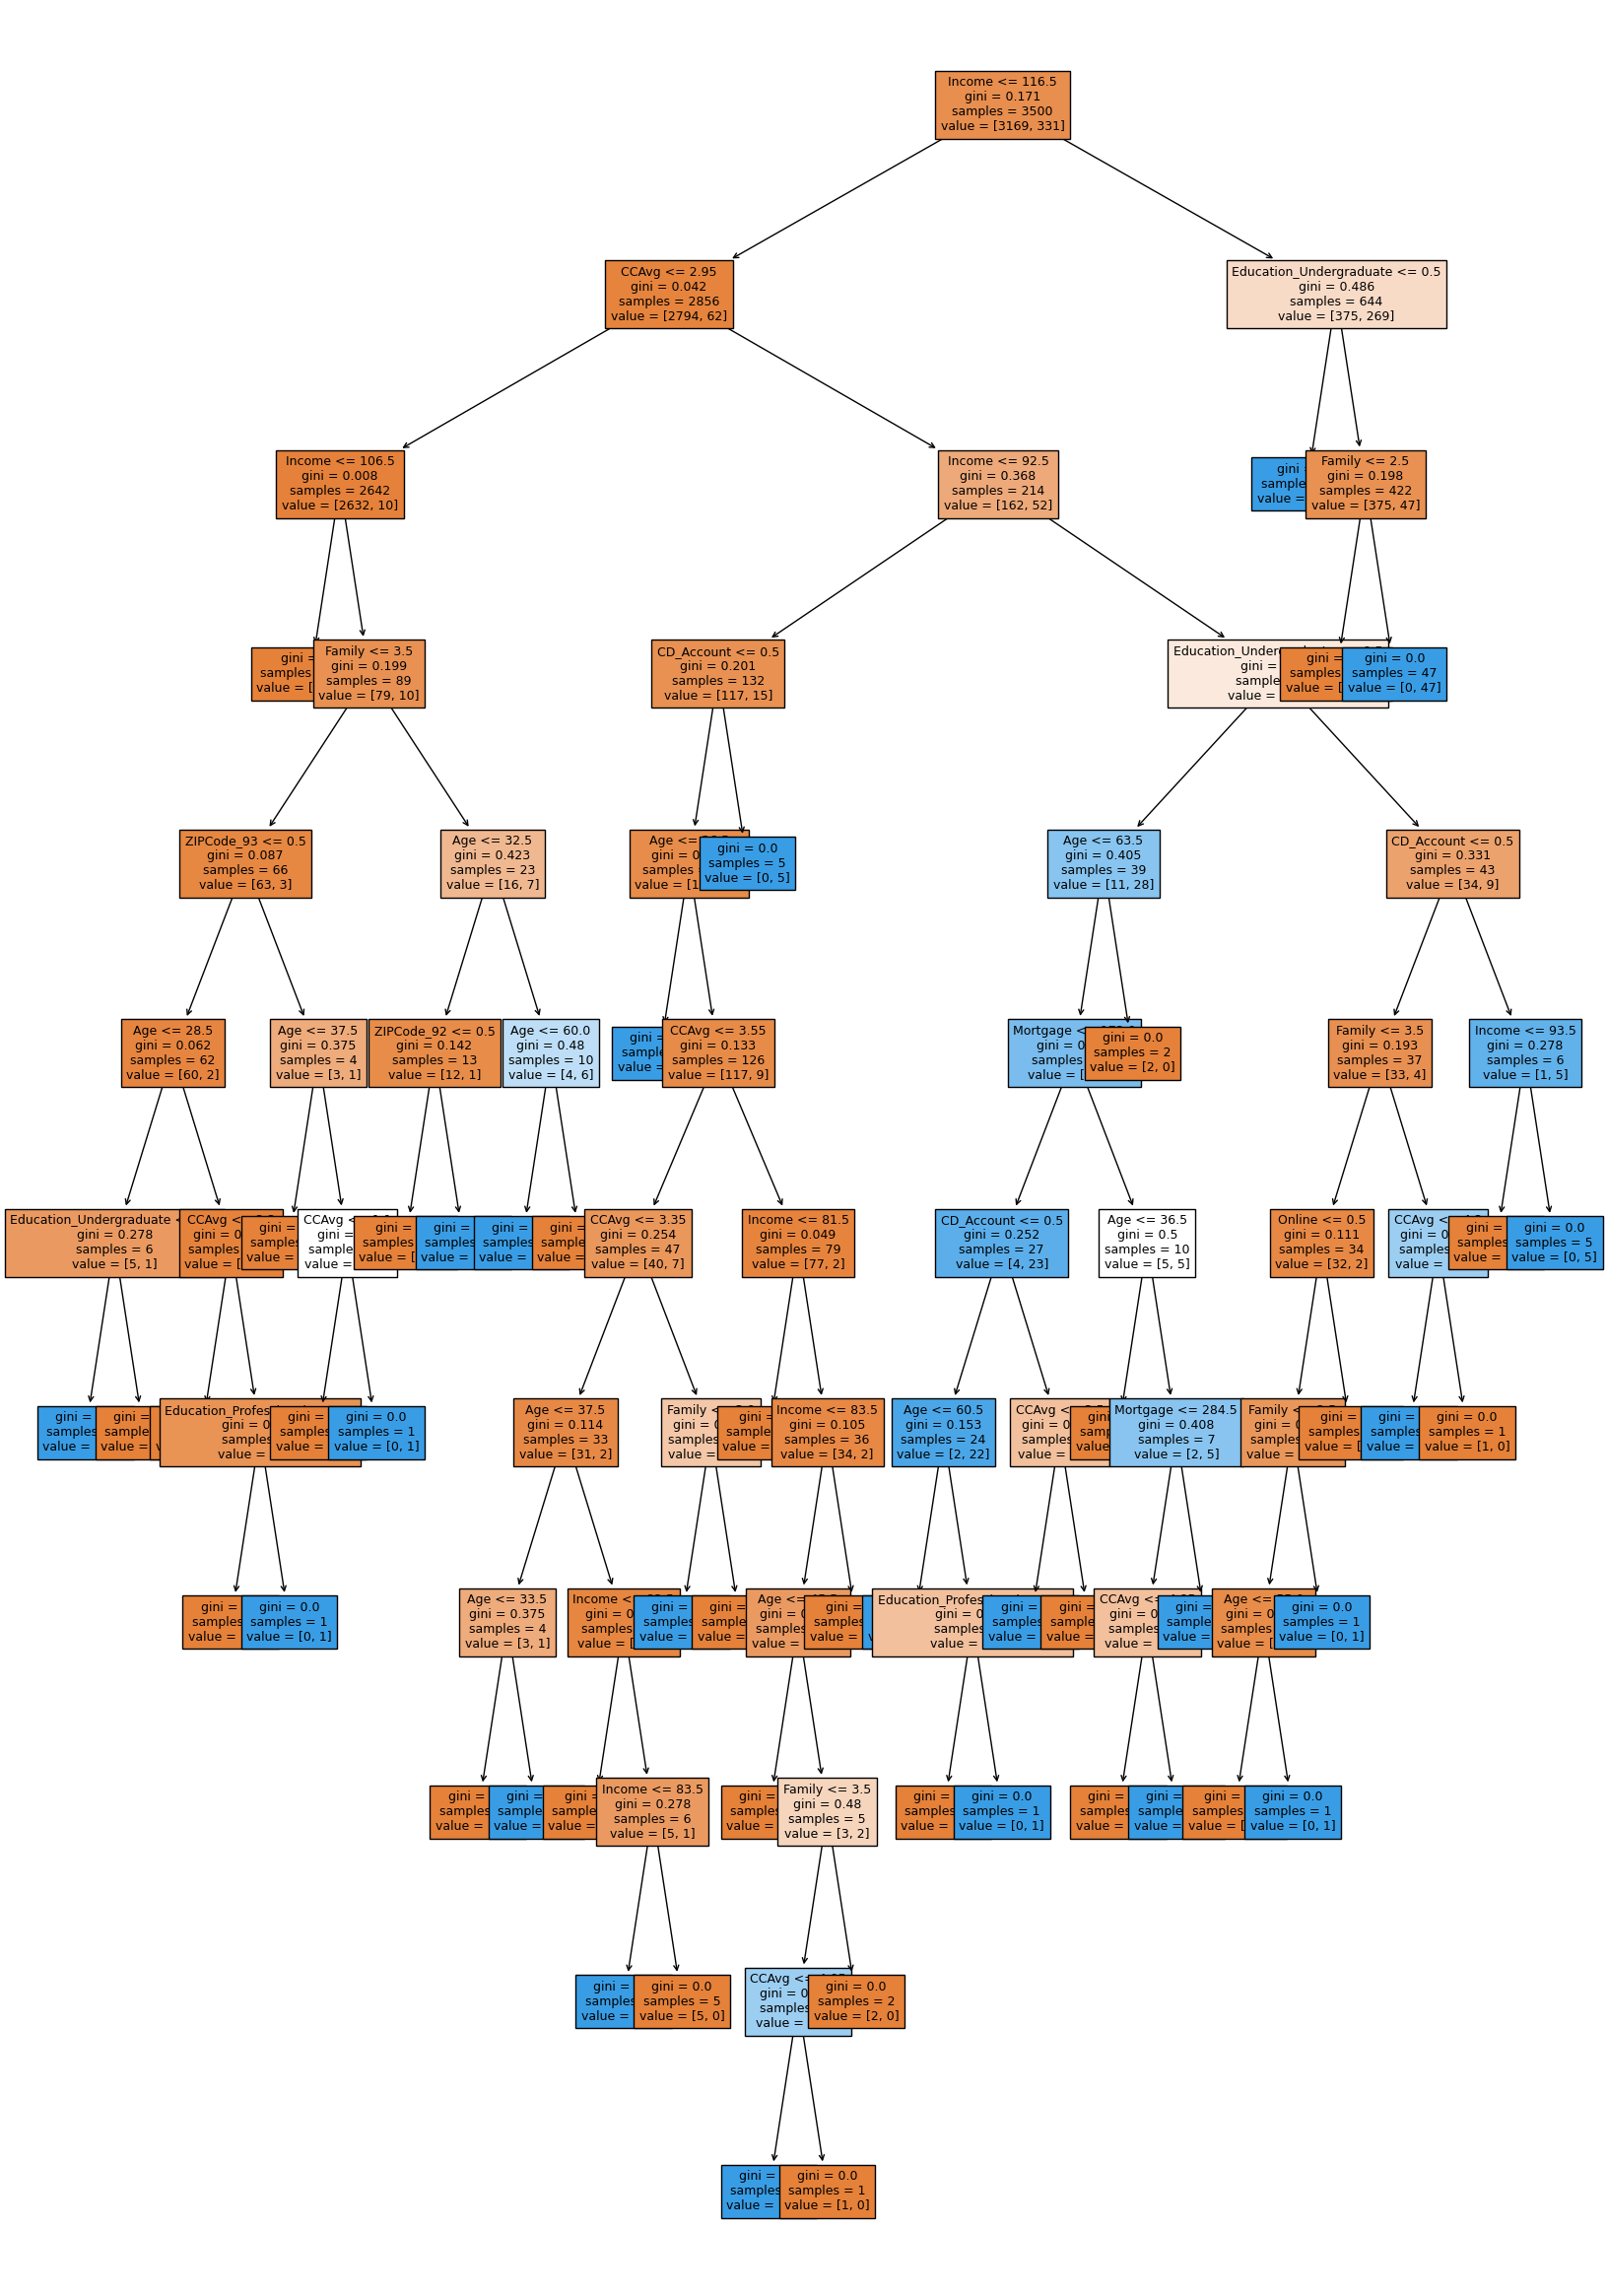

In [198]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [199]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

In [200]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.304761
Family                   0.161717
CCAvg                    0.053107
Age                      0.036035
CD_Account               0.025711
Mortgage                 0.005557
Education_Professional   0.005144
ZIPCode_92               0.003080
ZIPCode_93               0.000594
Online                   0.000561
Securities_Account       0.000000
ZIPCode_91               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
CreditCard               0.000000


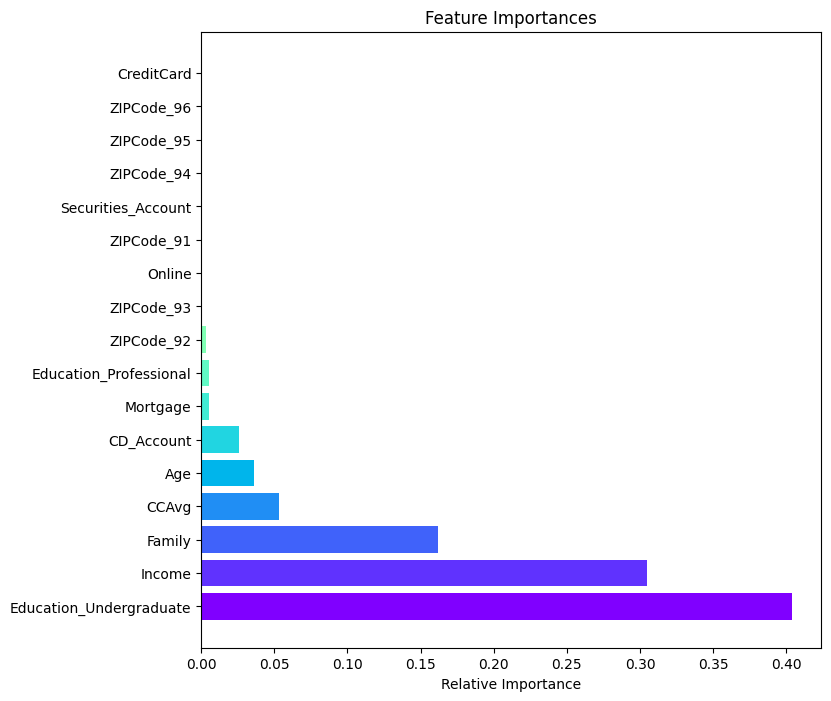

In [201]:
import matplotlib.cm as cm

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color=cm.rainbow(np.linspace(0, 1, len(indices))), align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Checking model performance on test data

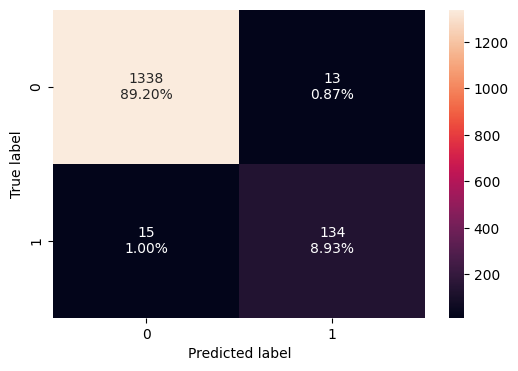

In [202]:
confusion_matrix_sklearn(model, X_test, y_test)  # Complete the code to get the confusion matrix for test data


In [203]:
# Complete the code to get the model formance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.899329,0.911565,0.905405


## Model Building

### Model Evaluation Criterion

*


### Model Building

# Pre-Pruning
Pre-Pruning



In [204]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

# Checking performance on training data



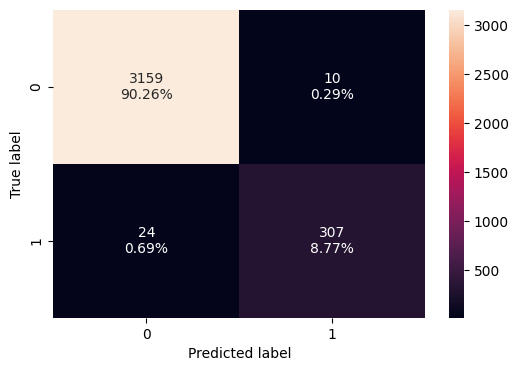

In [205]:
confusion_matrix_sklearn(estimator, X_train, y_train) ## Complete the code to create confusion matrix for train data


In [206]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


# Visualizing the Decision Tree



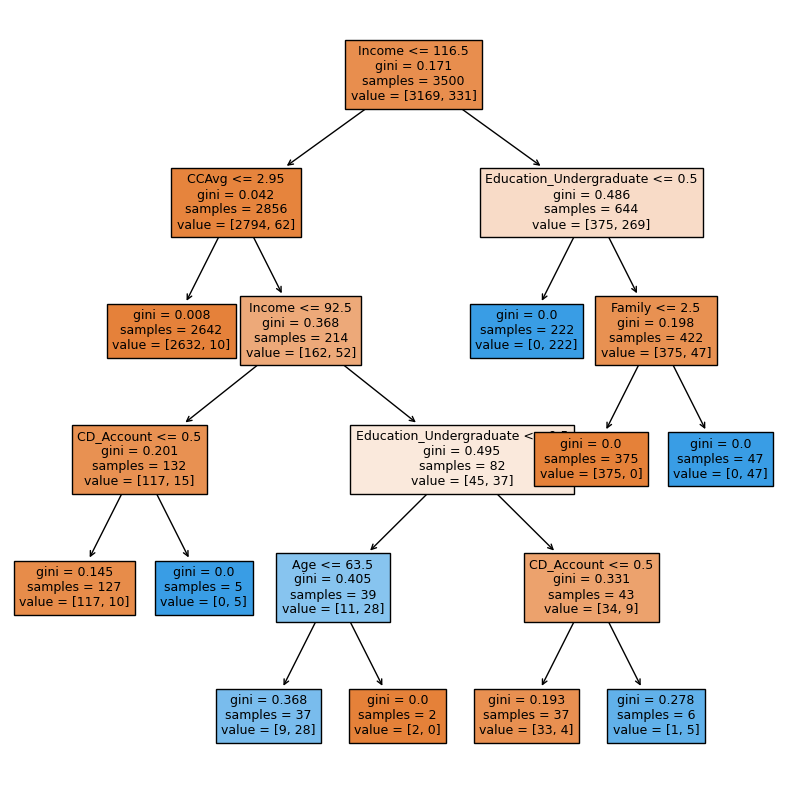

In [211]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [212]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

In [213]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.446191
Income                   0.327387
Family                   0.155083
CCAvg                    0.042061
CD_Account               0.025243
Age                      0.004035
Securities_Account       0.000000
Online                   0.000000
Mortgage                 0.000000
ZIPCode_91               0.000000
ZIPCode_92               0.000000
ZIPCode_93               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


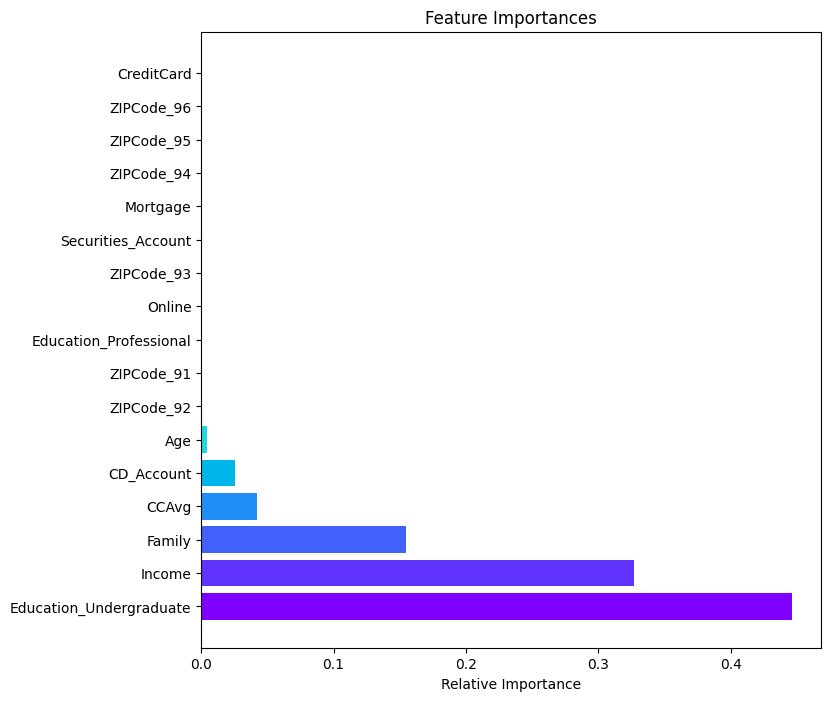

In [214]:
importances = estimator.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color=cm.rainbow(np.linspace(0, 1, len(indices))), align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Checking performance on test data

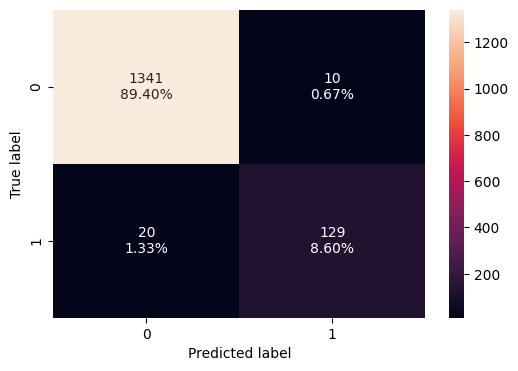

In [215]:
confusion_matrix_sklearn(estimator, X_test, y_test)  # Complete the code to get the confusion matrix on test data


In [216]:
# Complete the code to get the model performance on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


# Cost-Complexity Pruning


In [217]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [218]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000381,0.006423


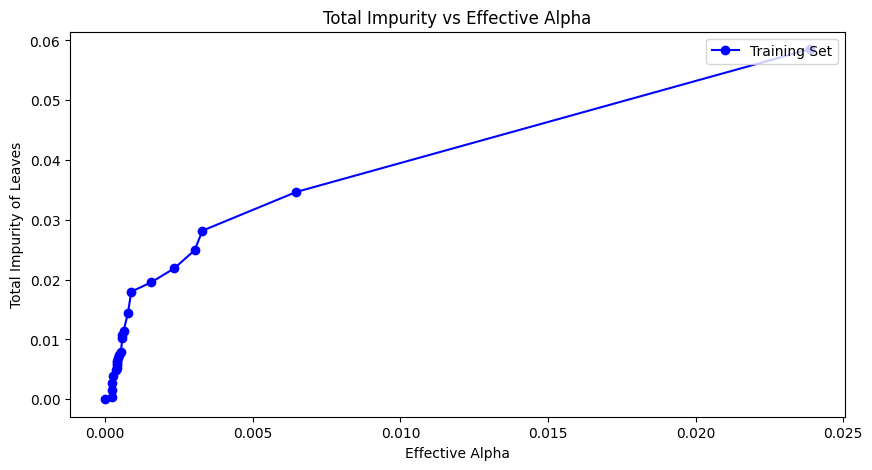

In [219]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", linestyle="-", color="blue", label="Training Set")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha")
ax.legend(loc="upper right")
plt.show()

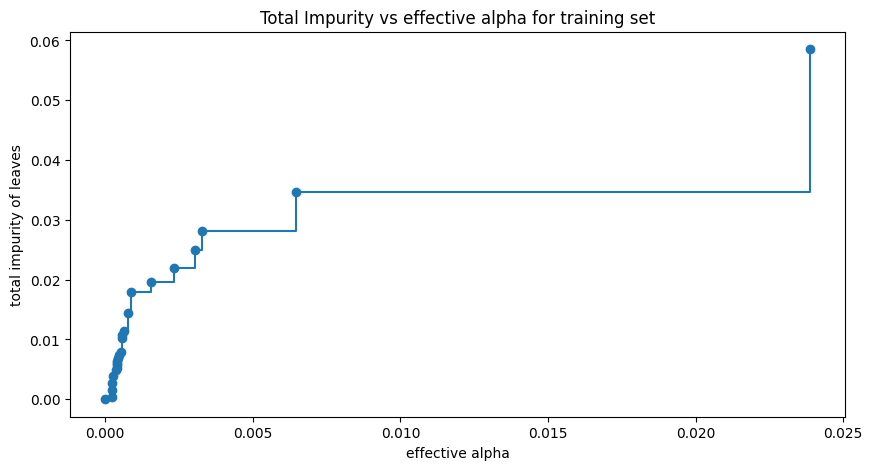

In [220]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [221]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


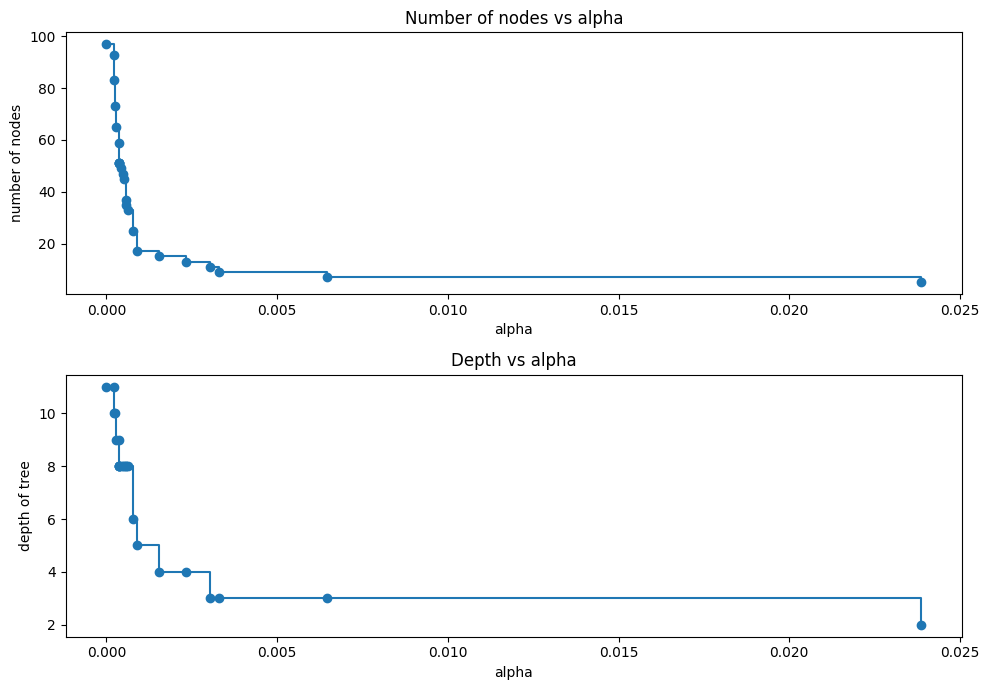

In [222]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# Recall vs alpha for training and testing sets

In [223]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

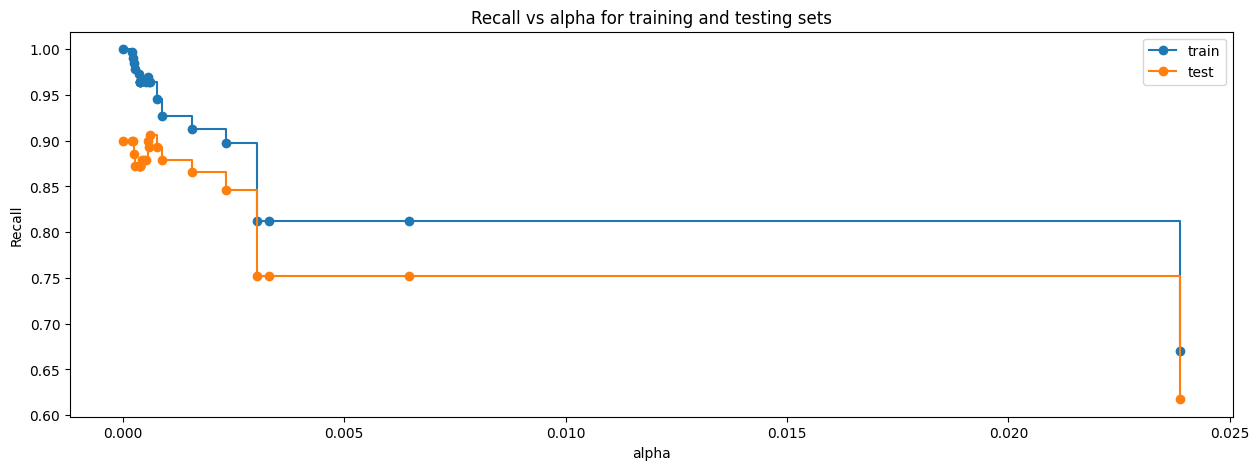

In [224]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [225]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


# Post-Purning

In [226]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.0006209286209286216, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

# Checking performance on training data


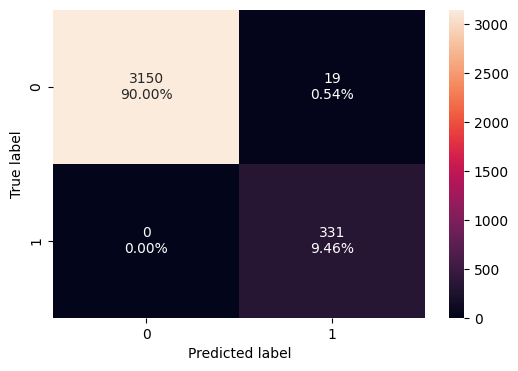

In [227]:
confusion_matrix_sklearn(estimator_2, X_train, y_train) ## Complete the code to create confusion matrix for train data


In [228]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.994571,1.0,0.945714,0.9721


# Visualizing the Decision Tree



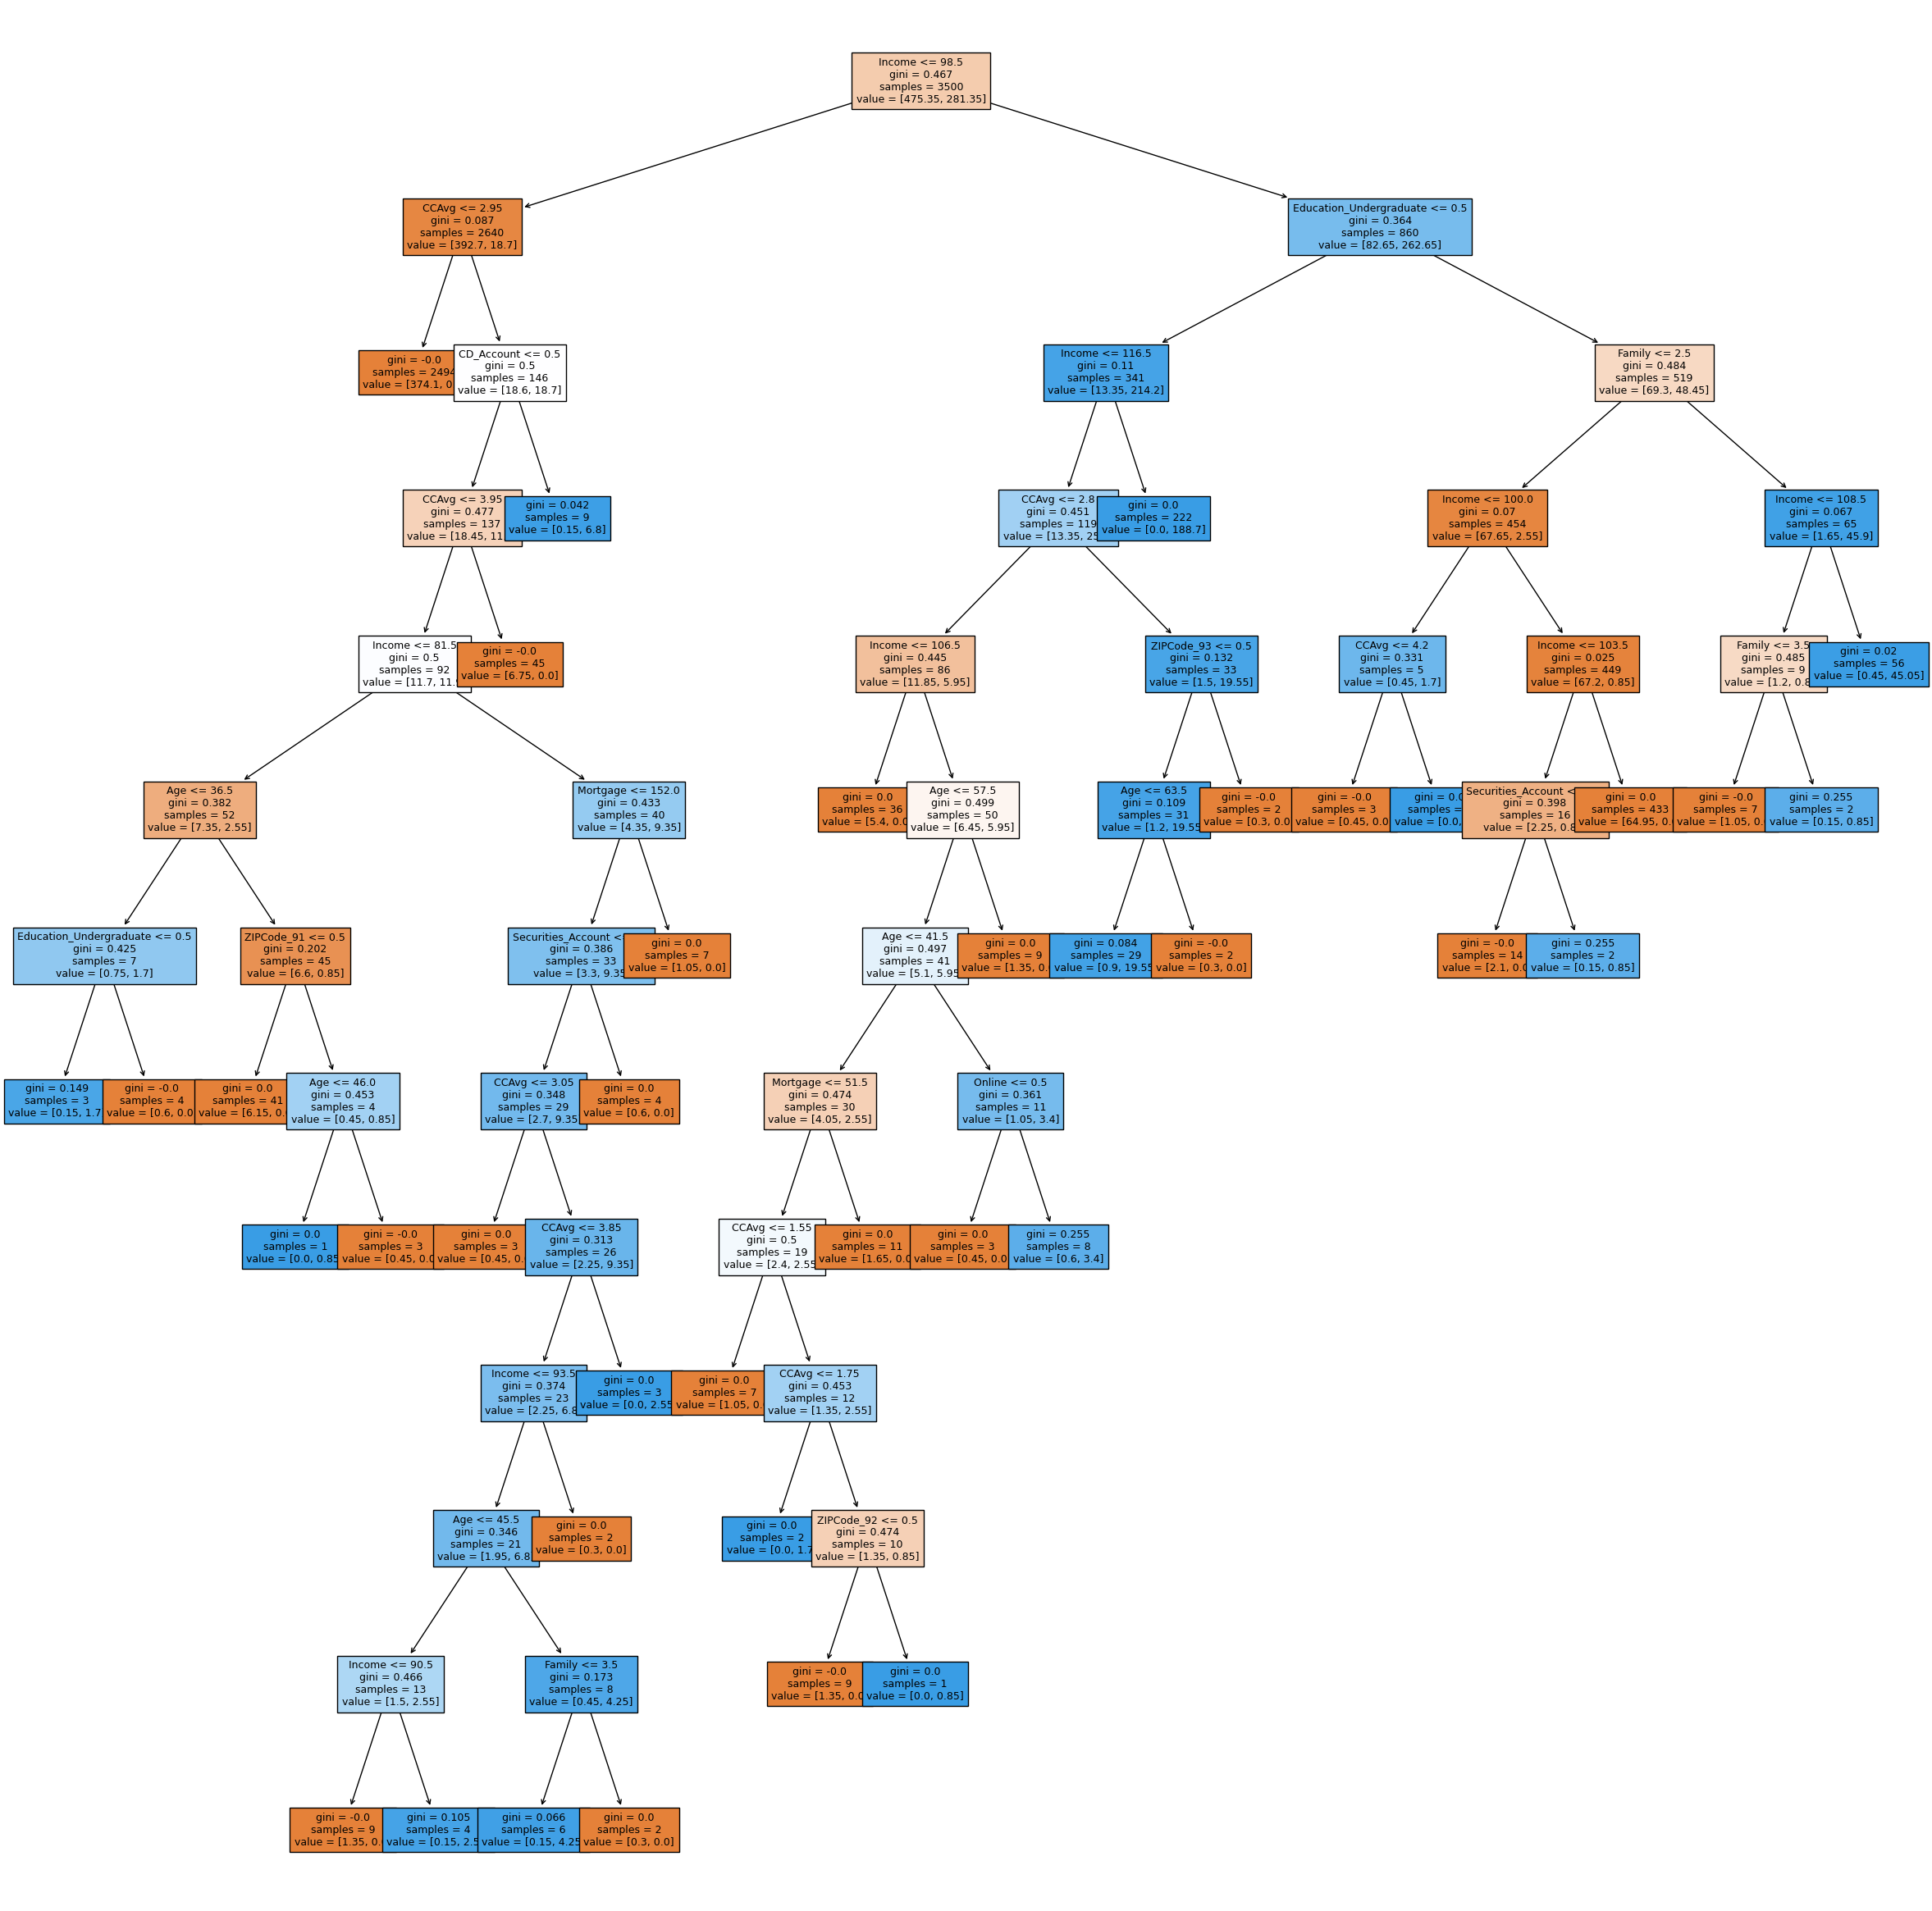

In [229]:
plt.figure(figsize=(30, 30))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [230]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Age >  46.00
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <=

In [231]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.602209
Family                   0.144151
Education_Undergraduate  0.127332
CCAvg                    0.084681
Age                      0.011925
CD_Account               0.011166
Mortgage                 0.004929
Securities_Account       0.004788
ZIPCode_92               0.002996
ZIPCode_91               0.002635
Online                   0.001679
ZIPCode_93               0.001508
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


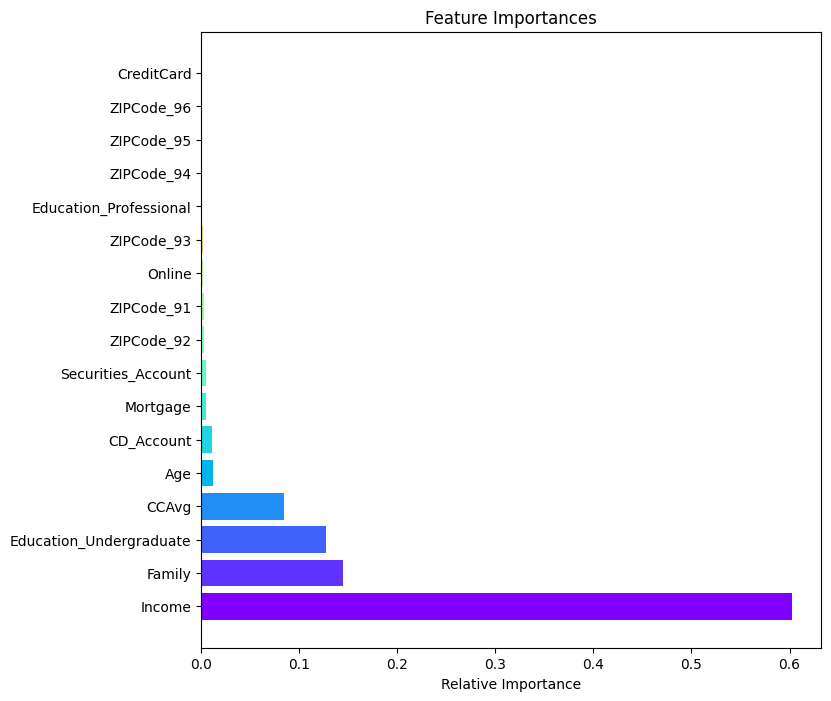

In [232]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color=cm.rainbow(np.linspace(0, 1, len(indices))), align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

 
 
 
 
 # Checking performance on test data



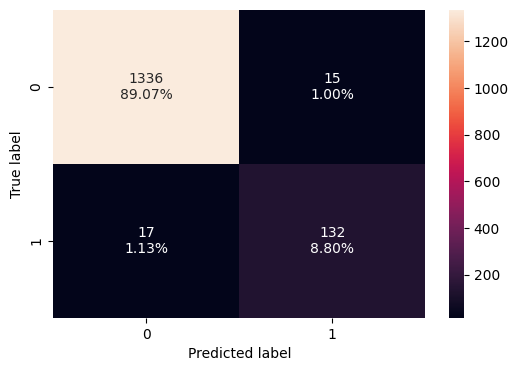

In [233]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)  # Complete the code to get the confusion matrix on test data


In [234]:
# Complete the code to get the model performance on test data
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.885906,0.897959,0.891892


### Model Performance Improvement

In [235]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.990286,0.994571
Recall,1.0,0.927492,1.000000
Precision,1.0,0.968454,0.945714
F1,1.0,0.947531,0.972100


In [236]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Testing performance comparison:")
models_test_comp_df

## Complete the code to compare performance of test set

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.981333,0.980000,0.978667
Recall,0.899329,0.865772,0.885906
Precision,0.911565,0.928058,0.897959
F1,0.905405,0.895833,0.891892


## Model Comparison and Final Model Selection

In [121]:
# Comparison of models with Train dataset

In [237]:
# training performance comparison

models_train_comp_df = pd.concat(
    [

        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_tune_post_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [

    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.990286,0.978667
Recall,1.0,0.927492,0.885906
Precision,1.0,0.968454,0.897959
F1,1.0,0.947531,0.891892


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___

Model Insights and Recommendations
Predictive Modeling:
    We developed logistic regression models to predict the likelihood of customers purchasing a loan.
    Key feature engineering insights:
        Undergraduate education and family size (3-4 members) emerged as significant predictors of loan purchase propensity.
        Income was also a crucial factor, as expected.
Geospatial Analysis:
    We created a map to visualize the distribution of target customers, enabling targeted marketing efforts.
    By analyzing counties with low p-values, we identified areas with statistically significant correlations between the predictors and loan purchase behavior.
Model Enhancement and Future Directions:
    To further improve the model, we recommend:
        Re-running logistic regression with additional variables, such as credit score and employment history.
        Exploring alternative machine learning algorithms, like decision trees and random forests.
        Regularly updating the model with new data to maintain its predictive accuracy.
Targeted Marketing Strategies:
    Focus on customers with lower income, smaller families, or less education, as they are more likely to be interested in personal loans.
    Offer personalized promotions, such as more favorable terms, to high-income customers who are less likely to need loans.
    Identify preferred communication channels (e.g., email, social media, direct mail) and prioritize marketing efforts accordingly.
Financial Education and Model Update:
    Develop financial education campaigns to highlight the benefits of personal loans and responsible borrowing practices.
    Regularly update the model with new data to adapt to changing market trends and customer behavior.

